<hr>

<h1> Problem 1: Random Variables <h1/> 
     
<h4> Gabriel de Almeida Miki </h4>

<hr>

<img src = 'problem1.png'>

<hr>

In [1]:
%matplotlib inline

import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def randomFuncMaq(n, p0, s):
    # Variável utilizada para a checagem das máquinas
    maq_check_up = 0
    
    # Variável para a verificação de colapso do sistema
    num_maq_reservas = s
    
    # Variável utilizada no auxílio da checagem de máquinas. Possibilita a continuidade do algoritmo
    # quando há máquinas quebradas no sistema
    extra = 0
    
    # Vetor de armazenagem das probabilidades finais de determinada máquina quebrar para cada unidade de tempo passada
    prob_final = np.zeros(n + s)
    
    # Lista para armazenagem de números aleatórios e vetor de parametros para as maquinas com configuração inicial: Linha um
    # informa se a maquina esta quebrada ou nao (1, 0), linha dois o tempo de concerto e a linha tres a probabilidade de quebra
    # das maquinas
    n_random_nums = list()
    maquinas = np.vstack((np.zeros([2, s + n]), np.ones(s + n) * p0))

    for uni_temp in range(1000):
        
        # Geração de números aleatórios
        for geracao_random_nums in range(n):
            n_random_nums.append(random.random())
            
#        print("\nProbabilidades Geradas em ", uni_temp + 1, ":\n", n_random_nums, "\n")
         
        # Verificação para um total de len(n_random_nums) gerados. 
        while maq_check_up < len(n_random_nums):
            
            # Verificação de quebra da máquina (maq_check_up + extra).
            if maquinas[0, maq_check_up + extra] == 0 and n_random_nums[maq_check_up] < maquinas[2, maq_check_up + extra]:            

#                print("\nQuebra máquina ", maq_check_up + extra, "devido a: ", maquinas[2, maq_check_up + extra], " > ", 
#                      n_random_nums[maq_check_up], "\nTotal máquinas reserva: ", num_maq_reservas - 1, "\n")
                maquinas[2, maq_check_up + extra] = p0
                maquinas[0, maq_check_up + extra] = 1
                maq_check_up += 1
                num_maq_reservas -= 1
                
                # Checagem de número de máquinas reservas restantes: num_maq_reservas < 0 == Colapso.
                if num_maq_reservas < 0:
#                    print("\n", "Colapso no passo ", uni_temp + 1, ":\n", 
#                          pd.DataFrame(maquinas, index = ['Quebra', 'Tempo de Concerto', 'Probabilidade de Quebra']), "\n")
                    return uni_temp + 1
                    
                continue
                 
            # Verificação da não quebra da (maq_check_up + extra).
            elif maquinas[0, maq_check_up + extra] == 0 and n_random_nums[maq_check_up] >= maquinas[2, maq_check_up + extra]:
                
                # Aumento da probabilidade de quebra.
                maquinas[2, maq_check_up + extra] = maquinas[2, maq_check_up + extra] + 0.0005
                maq_check_up += 1
                
                continue
                
            # Caso não entre em nenhum dos if's (máquina está quebrada, [0, maq_check_up + extra] == 1), soma-se um   
            # ao extra para que o algorítmo continue e passe por um total de len(n_random_nums) máquinas em funcionamento.
            extra += 1
            
        maq_check_up -= 1
        
        # Checagem de quebra para atribuição de tempo de concerto (range(s + n) == len(n_random_nums)).
        for maquina in range(s + n):
            
            # Máquina quebrada e sem valor para tempo de concerto, assinala-se um valor aleatório entre 20, 40 e 60.
            if maquinas[0, maquina] == 1 and maquinas[1, maquina] == 0:
                
                maquinas[1, maquina] = random.choice([20, 40, 60])
                
            # Máquina quebrada com valor de tempo de concerto já atribuido, atualiza-se o mesmo.    
            elif maquinas[0, maquina] == 1 and maquinas[1, maquina] != 0:                
            
                maquinas[1, maquina] = maquinas[1, maquina] - 1
                
                # Caso a máquina seja concertada nessa unidade de tempo ela se torna, mais uma vez, disponível,
                # ou seja, maquinas[0, maquina] == 0.
                if maquinas[1, maquina] == 0:
                    
                    num_maq_reservas += 1
                    
                    # Como é possível observar abaixo os valores de maq_check_up e extra não são zerados logo após seu uso
                    # devido a sua utilidade em mostrar a máuina de maior valor de indexação em uso. Isso é necessário pois,
                    # na parcela anterior, a verificação das máquinas ocorre por meio da checagem do conteúdo da primeira
                    # linha do array maquinas. Sendo assim como a presente máquina será concertada, a contagem será prejudicada,
                    # para a resolução de tal problema optamos por 'trocar' a maquina (maq_check_up + extra) de lugar. Isso é 
                    # feito atribuindo a corrente probabilidade de quebra para a máquina recem concertada.
                    maquinas[0, maquina] = 0
                    maquinas[2, maquina] = maquinas[2, maq_check_up + extra]
                    maquinas[2, maq_check_up + extra] = p0
                    extra -= 1
                    
        maq_check_up = 0 
        extra = 0    
        n_random_nums = list()
        
#        print("\n\nMatriz de Resultados em ", uni_temp + 1, ":\n", 
#              pd.DataFrame(maquinas, index = ['Quebra', 'Tempo de Concerto', 'Probabilidade de Quebra']), "\n\n")
        
    return uni_temp + 1

In [4]:
def listaDeIndexacao(sub_divs = 10):
    
    lista_de_indexacao = list()
    
    for i in range(sub_divs):
        lista_de_indexacao.append("Prob. Quebra antes de " + str((1000 / sub_divs) * (i + 1)) + " UT")
        
    return lista_de_indexacao

In [5]:
def listaDeColunas(val_s):
    
    lista_de_colunas = list()
    
    for s in val_s:
        lista_de_colunas.append(str(s) + " Maq. Reservas")
        
    return lista_de_colunas

In [6]:
def selecaoDeProba(probabilidades, contagem_results, sub_divs, s):
    
    for i in range(sub_divs):
        
        index = "Prob. Quebra antes de " + str((1000 / sub_divs) * (i + 1)) + " UT"
        coluna = str(s) + " Maq. Reservas"
        
        # Total de valores dentro do vetor de contegem da unidade de tempo em que o sistema colapsou
        # inferiores a certo numero
        cont = contagem_results[contagem_results <= ((1000 / sub_divs) * (i + 1))].shape[0]
        
        # Armazenamento da divisão do número de colapsos abaixo de certo numero de unidade de tempo
        # divididos pelo numero de teste total
        probabilidades.loc[index, coluna] = cont / 1000
        
# Calcular média e desvio padrao

In [7]:
def testRandomFuncMaq(n, p0, sub_divs):
    
    max_val_s = int(input("\nIserir numero maximo de maquinas reservas: "))
    min_val_s = int(input("Iserir numero minimo de maquinas reservas: "))
    val_s = np.arange(min_val_s, max_val_s + 1)

    num_testes = int(input(
        "\nInserir numero de testes a serem realizados para cada quantidade de maquinas reservas no intervalo selecionado: "))
    
    # Vetor para armazenar os valores das unidades de tempo em que o sistema colapsou seguido do DataFrame usado
    # para o cálculo e armazenamento das probabilidades encontradas
    contagem_results = np.array(0)
    probabilidades = pd.DataFrame(index = listaDeIndexacao(sub_divs), columns = listaDeColunas(val_s))

    for s in val_s:
        for teste in range(num_testes):
            
            # Iteração, para cada valor de s no intervalo selecionado, dentro das mil unidades de tempo desejadas
            result = randomFuncMaq(n, p0, s)
             
            # Retorna a unidade de tempo em que um sistema de s máquinas reservas colapsou 
            # dentro das mil unidades de tempo desejadas um total de teste vezes e armazena tais valores 
            # em comtagem_results 
            contagem_results = np.hstack((contagem_results, result))
          
        # Calculo das probabilidades pelas ocorreências dos fenômenos  
        selecaoDeProba(probabilidades = probabilidades, contagem_results = contagem_results[1:],
                       sub_divs = sub_divs, s = s)   
        
        print("\nPara ", s, " máquinas reservas a média de unidades de tempo para colapso é: ", np.mean(contagem_results[1:]),
             "\nJá a variância assume um total de: ", np.var(contagem_results[1:]), "\n")
            
        
        # Todos os num_testes valores de unidades de tempo em que o sistema colapsou para s máquinas reservas
        # sao passados para um histograma e, por fim, são plotados      
        if s % 5 == 0:
            
            counts, bins = np.histogram(contagem_results[1:])
            
            plt.figure(figsize = (20, 7))
            gspec = gridspec.GridSpec(5, 5, hspace = 0.9)
            
            histogram = plt.subplot(gspec[:, 2:])
            box_plot = plt.subplot(gspec[:, :2])
            
            _, _, hist = histogram.hist(bins[:-1], bins, weights = counts, orientation = 'horizontal', color = 'navy')
            bplots = box_plot.boxplot(contagem_results[1:], showmeans = True)
            
            plt.suptitle(str(s) + " Máquinas Reservas", fontsize = 16, fontweight = 1000)
            histogram.set_xlabel("Freqûencia", fontsize = 12, fontweight = 800)
            box_plot.set_ylabel("Unidades de Tempo para Colapsar", fontsize = 12, fontweight = 800)
            
            histogram.set_yticklabels([])
            histogram.set_yticks([])
            histogram.set_xticks([])
            box_plot.set_xticks([])
            box_plot.set_xticklabels([])
            
            histogram.spines[['top', 'right', 'left']].set_visible(False)
            box_plot.spines[['top', 'right']].set_visible(False)
            
            for bar in hist:
                
                histogram.text(bar.get_width() + 8, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), 
                               ha='center', color='black', fontsize=11, fontweight = 600)
                
            for i, bplot in enumerate(bplots['boxes']):
                bplot.set(color='navy', linewidth=3)

            for whisker in bplots['whiskers']:
                whisker.set(color='navy', linewidth=3)

            for cap in bplots['caps']:
                cap.set(color='navy', linewidth=3)

            for median in bplots['medians']:
                median.set(color='navy', linewidth=3)
            
            plt.savefig('BoxPlot e Histograma ' + str(s) + ' Maquinas.png')
        
        contagem_results = np.array(0)
    
    return probabilidades

### a) n = 10 e p0 = 0.01


Iserir numero maximo de maquinas reservas:  20
Iserir numero minimo de maquinas reservas:  0

Inserir numero de testes a serem realizados para cada quantidade de maquinas reservas no intervalo selecionado:  1000



Para  0  máquinas reservas a média de unidades de tempo para colapso é:  8.214 
Já a variância assume um total de:  39.902204 


Para  1  máquinas reservas a média de unidades de tempo para colapso é:  14.374 
Já a variância assume um total de:  56.96612399999999 


Para  2  máquinas reservas a média de unidades de tempo para colapso é:  19.765 
Já a variância assume um total de:  73.349775 


Para  3  máquinas reservas a média de unidades de tempo para colapso é:  25.495 
Já a variância assume um total de:  92.20397499999999 


Para  4  máquinas reservas a média de unidades de tempo para colapso é:  30.995 
Já a variância assume um total de:  115.51897500000001 


Para  5  máquinas reservas a média de unidades de tempo para colapso é:  37.742 
Já a variância assume um total de:  149.695436 


Para  6  máquinas reservas a média de unidades de tempo para colapso é:  43.522 
Já a variância assume um total de:  183.803516 


Para  7  máquinas reservas a média de unidades de tempo para co

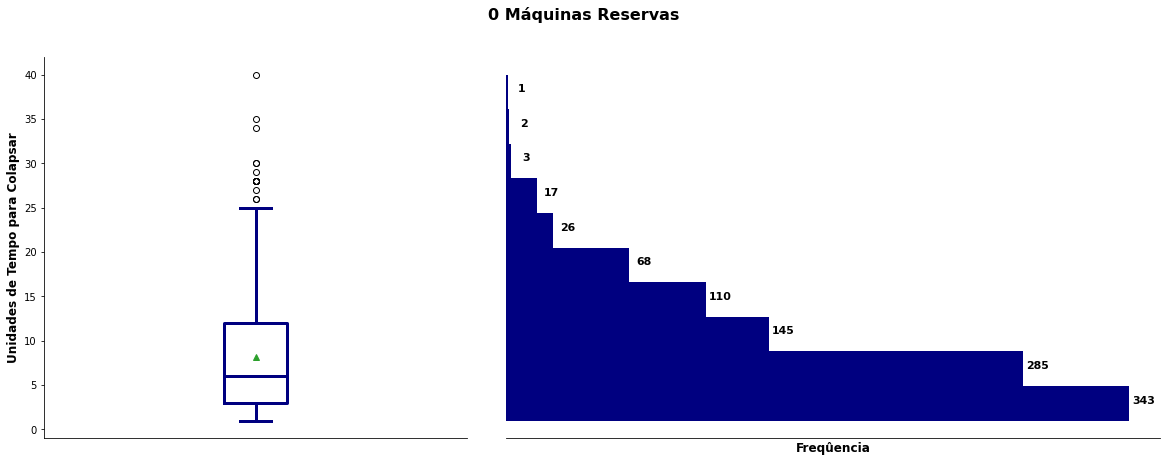

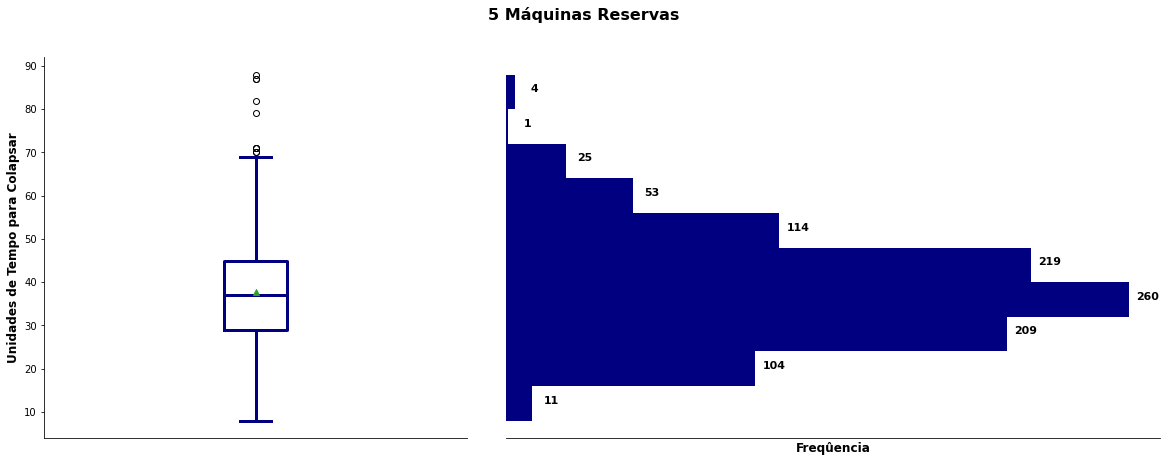

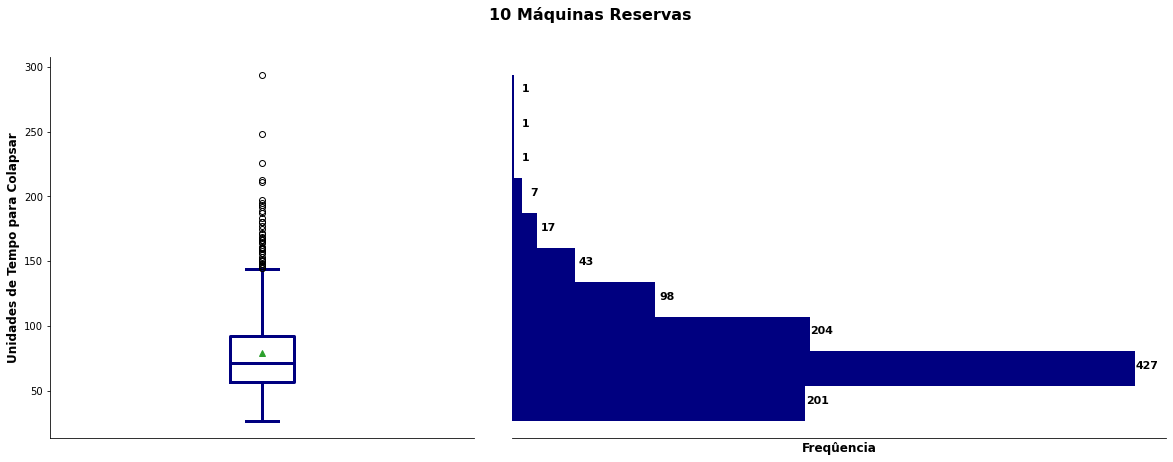

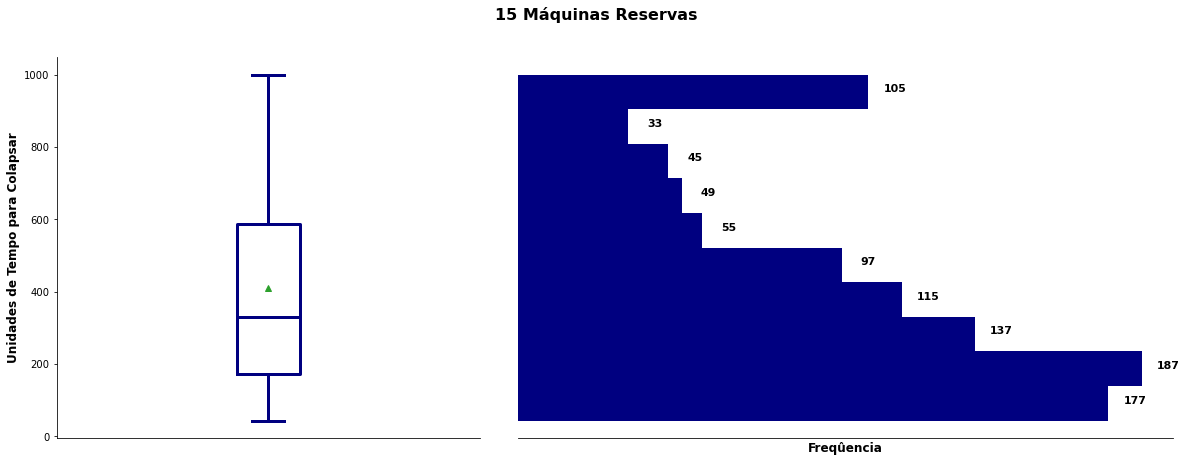

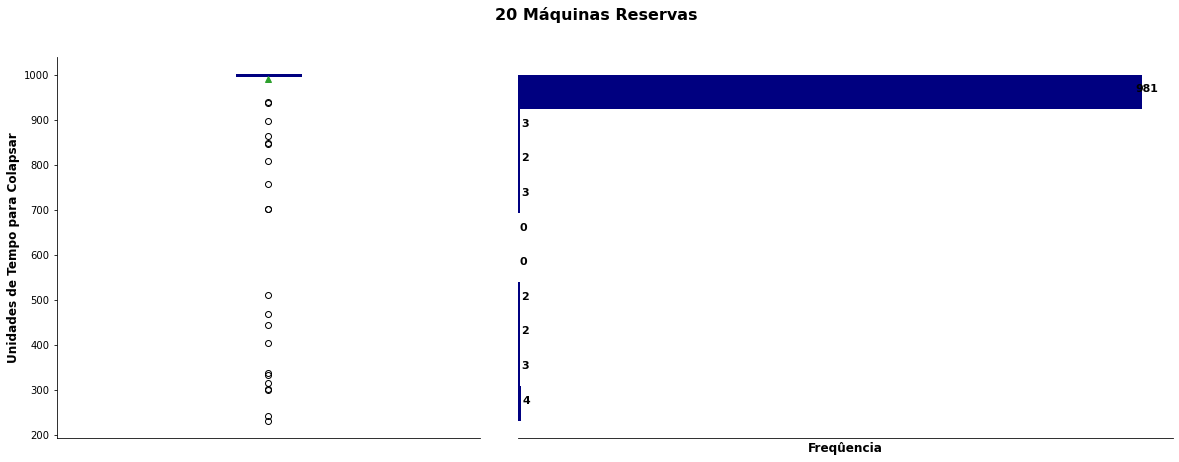

In [8]:
probs_a = testRandomFuncMaq(10, 0.01, 10)

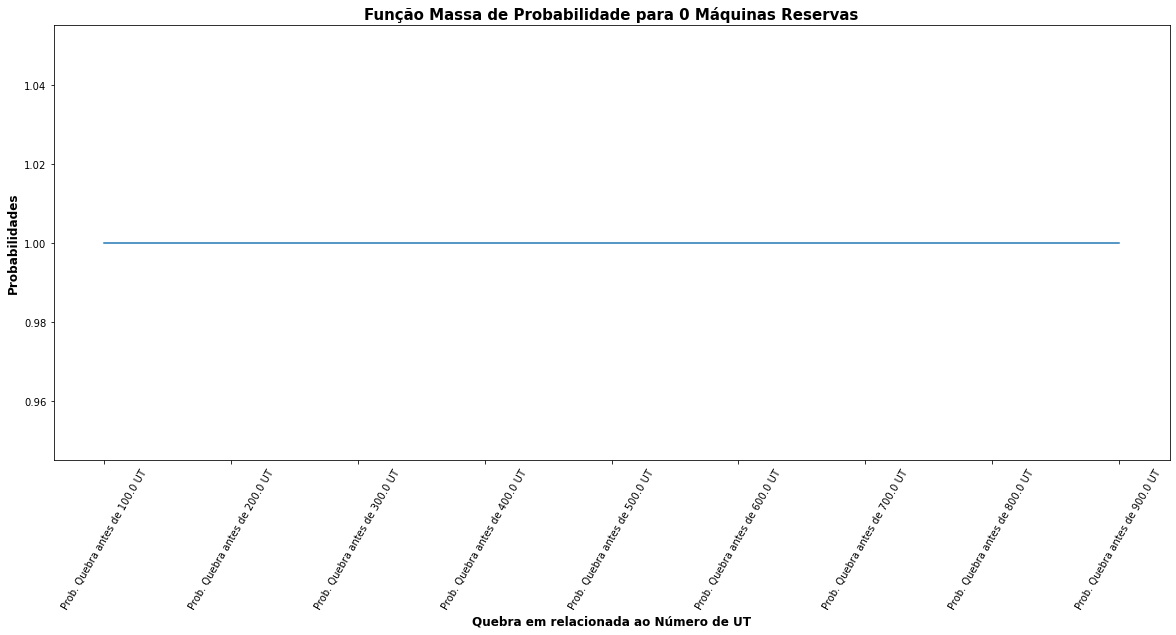

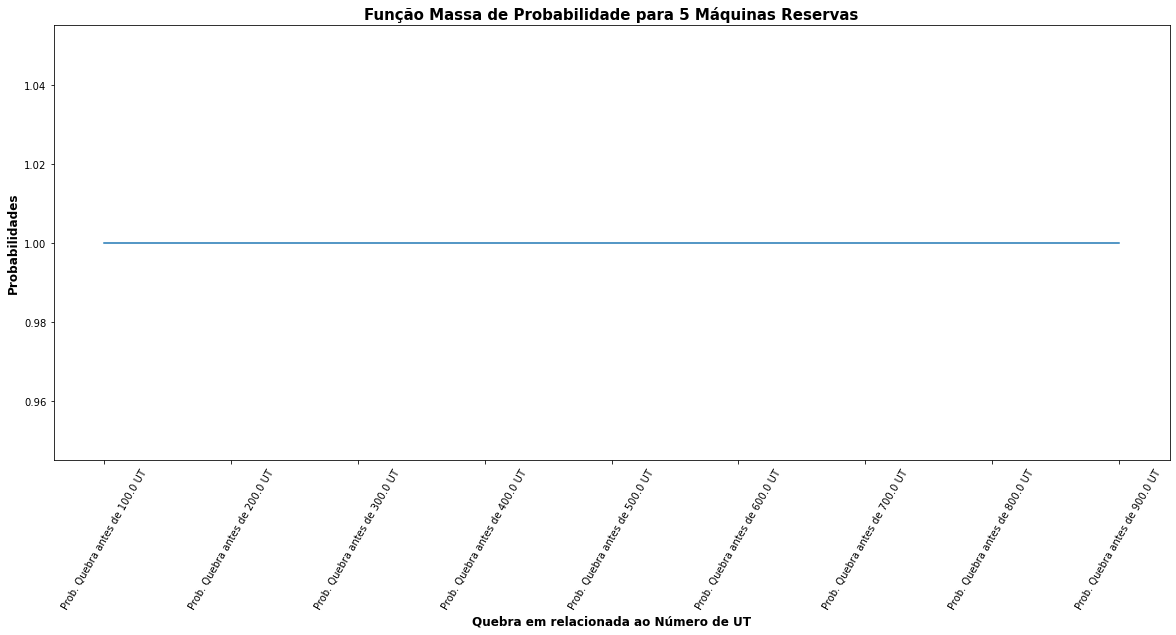

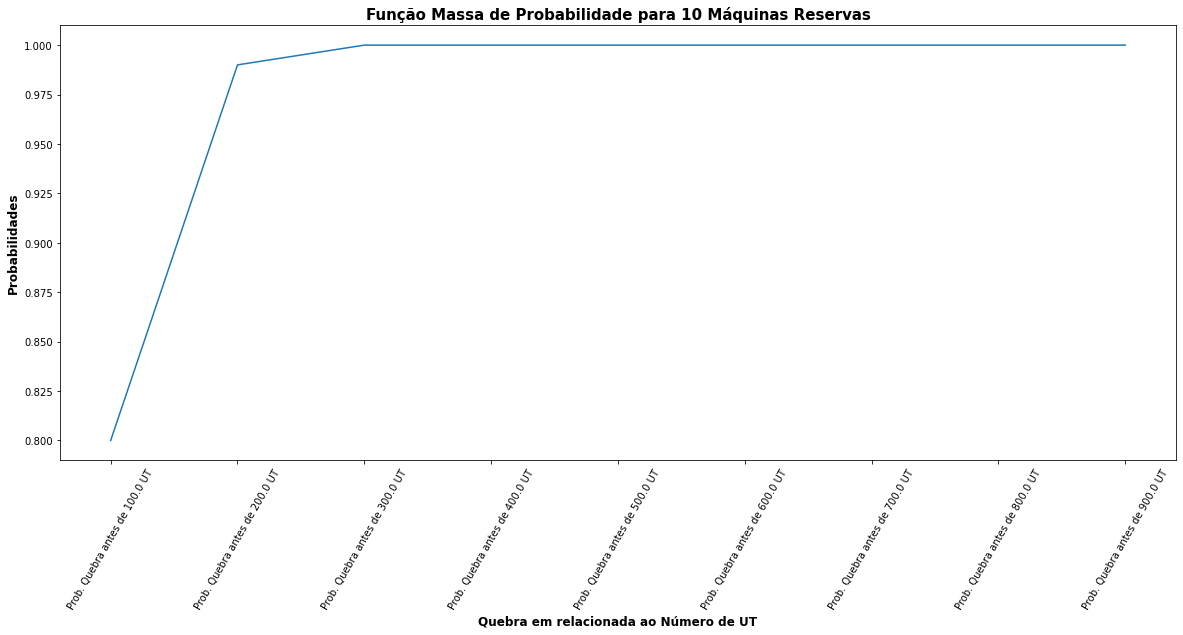

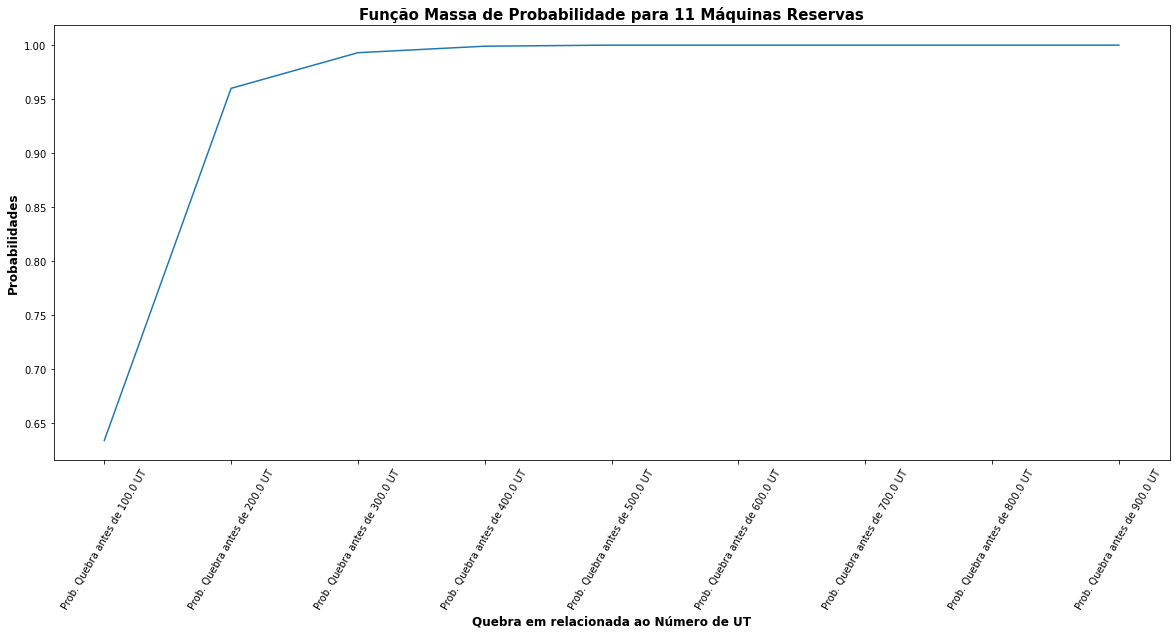

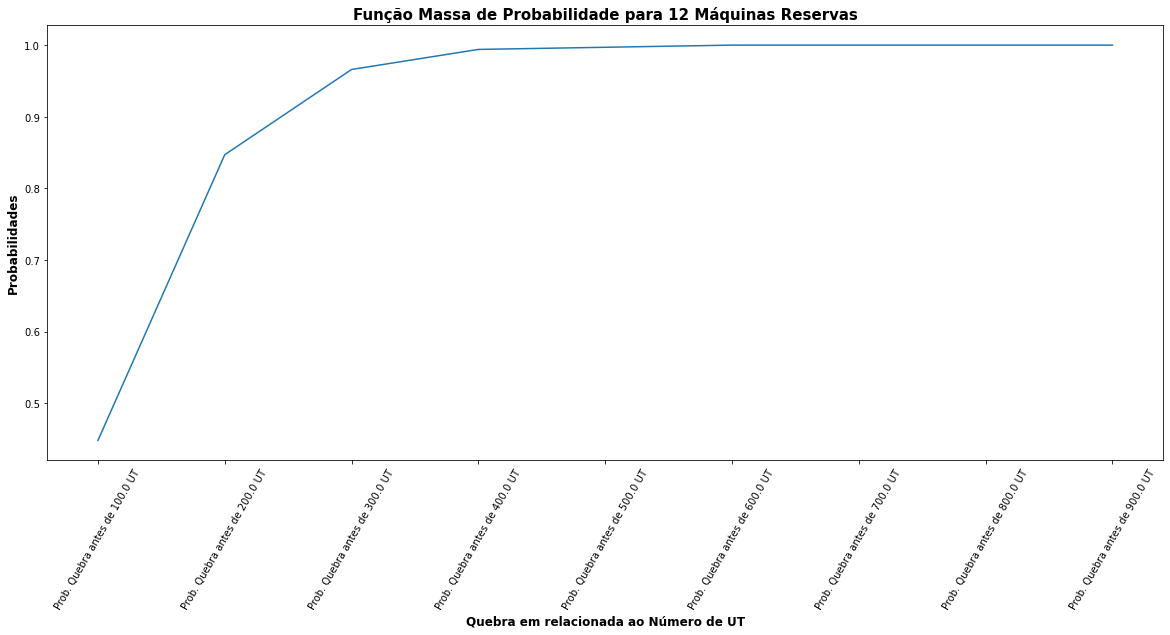

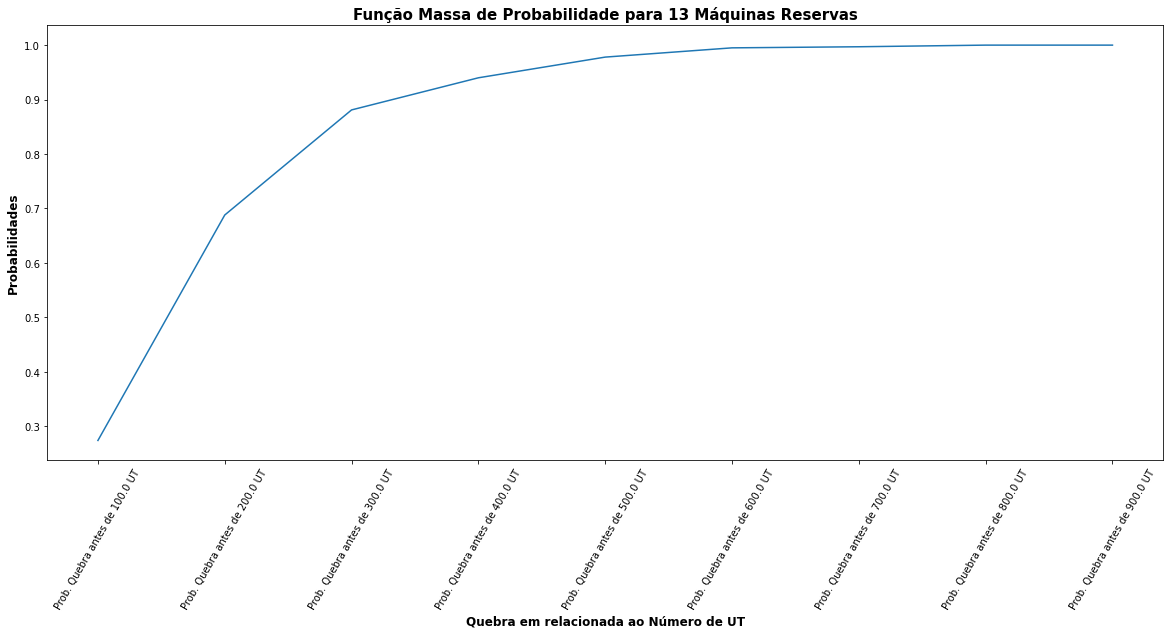

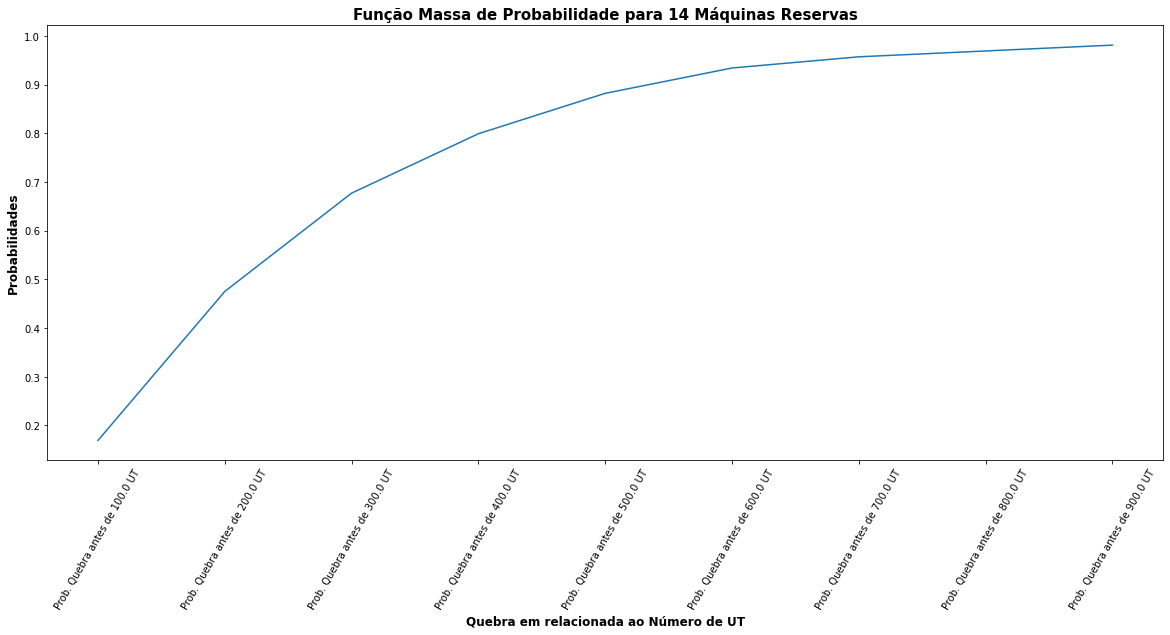

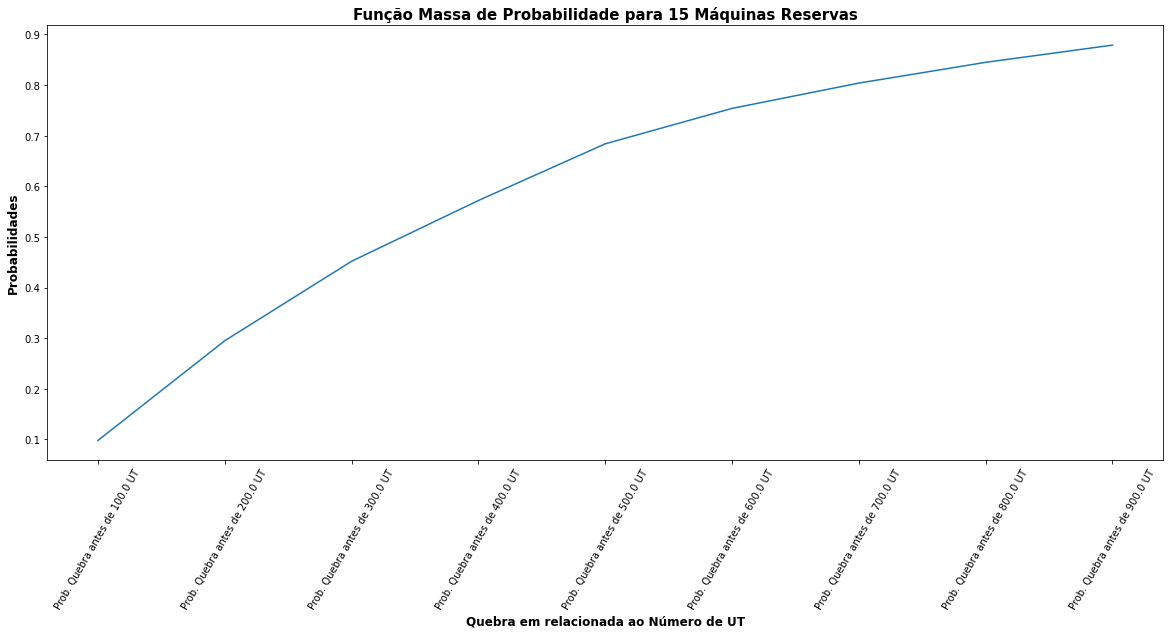

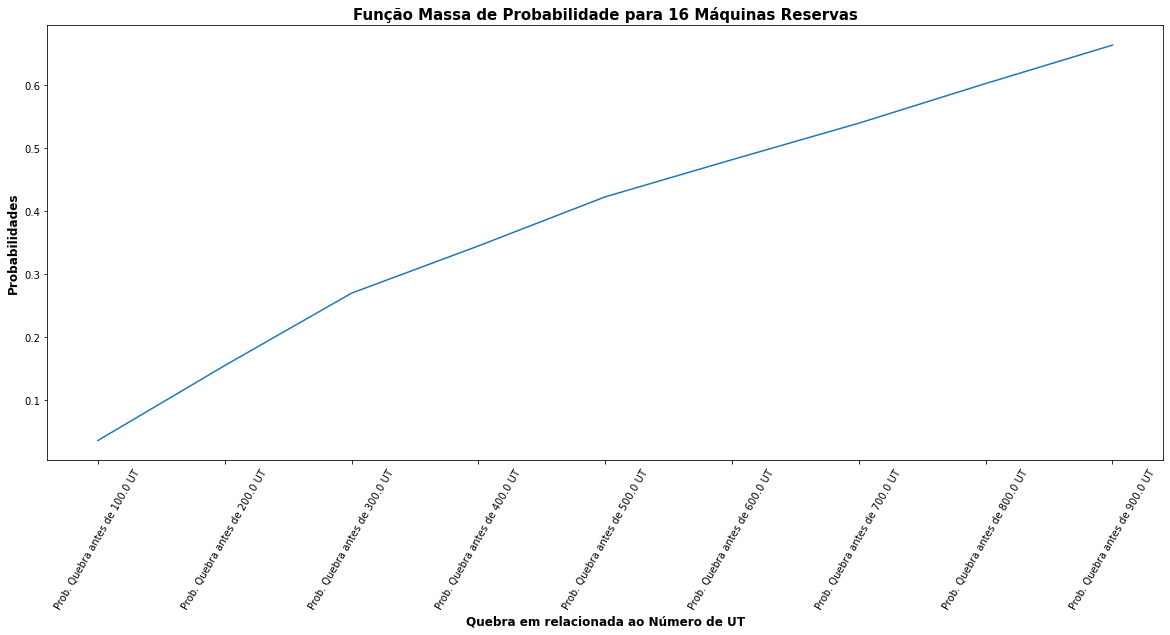

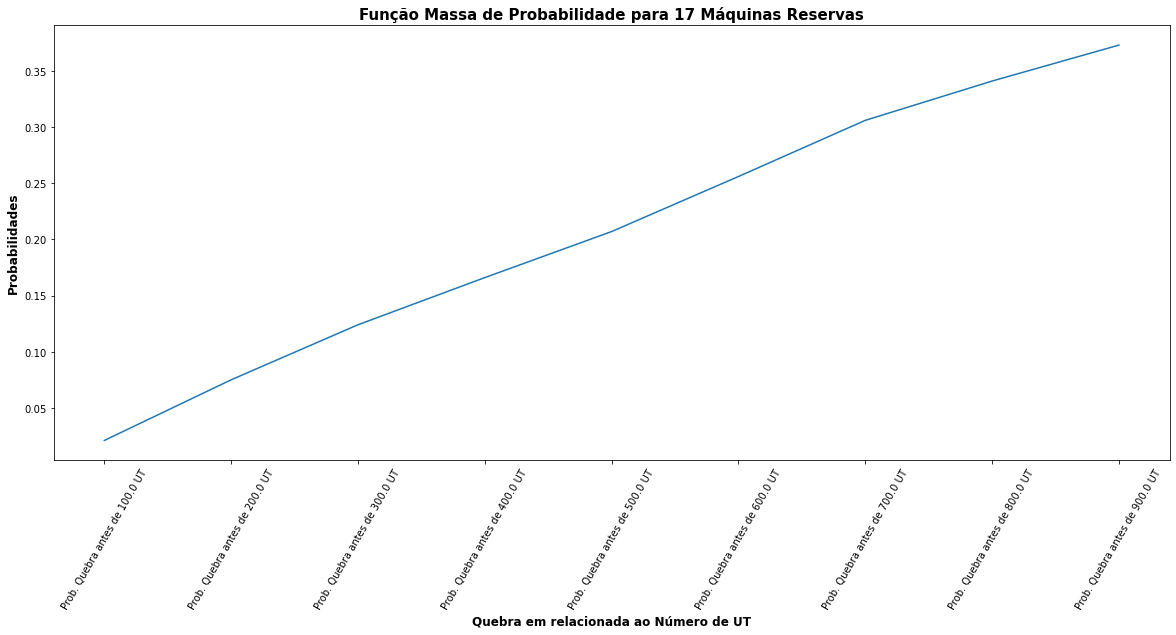

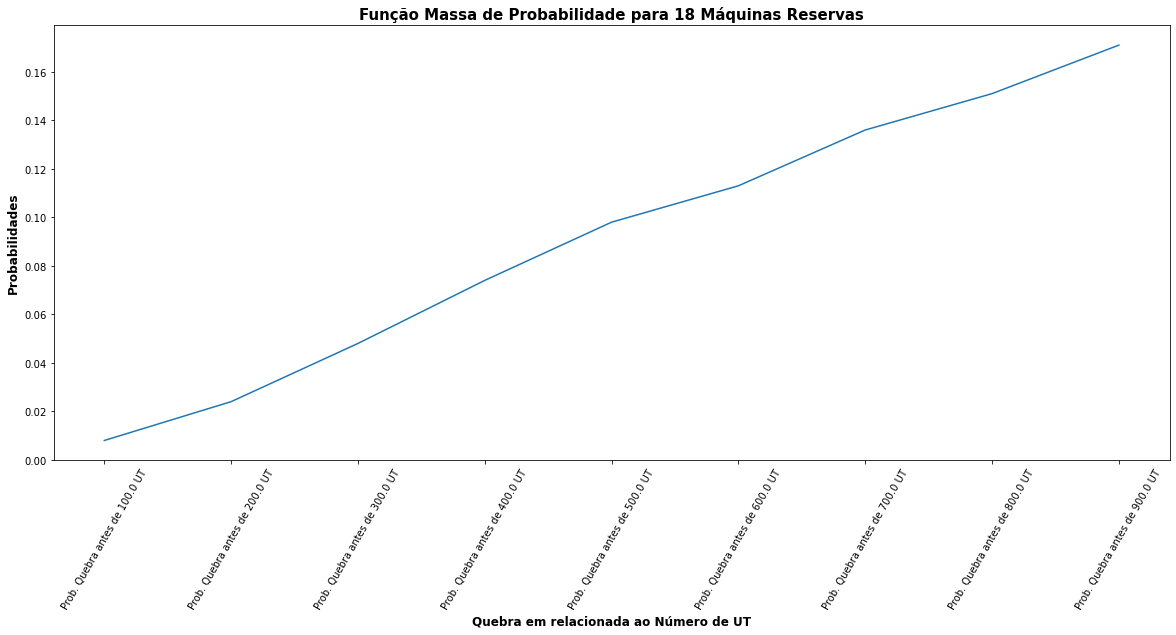

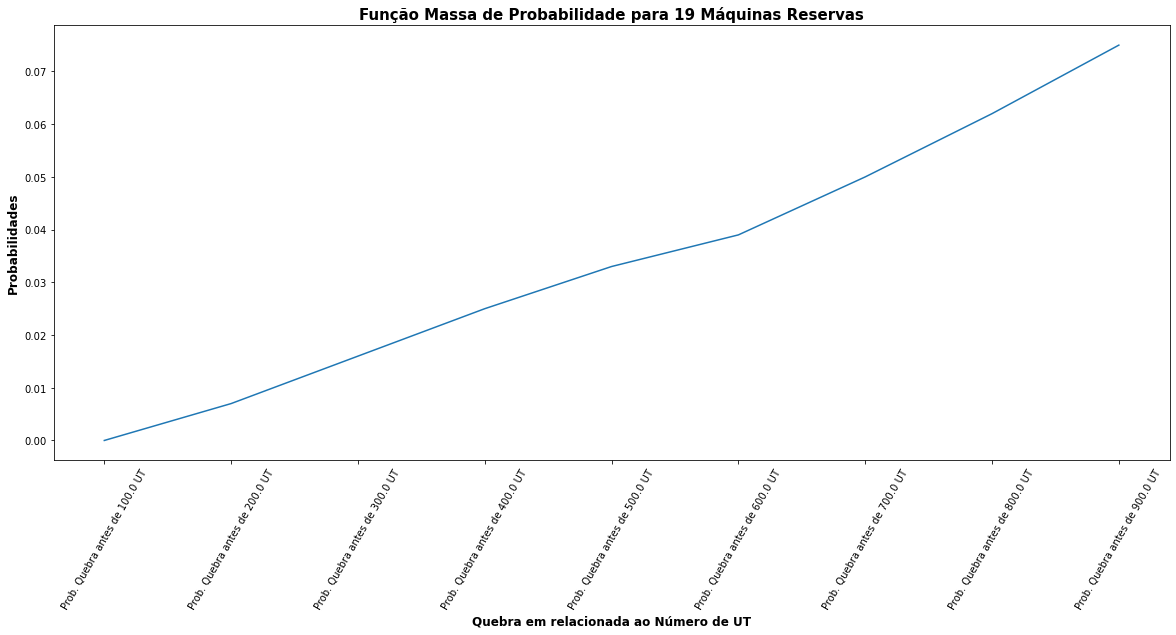

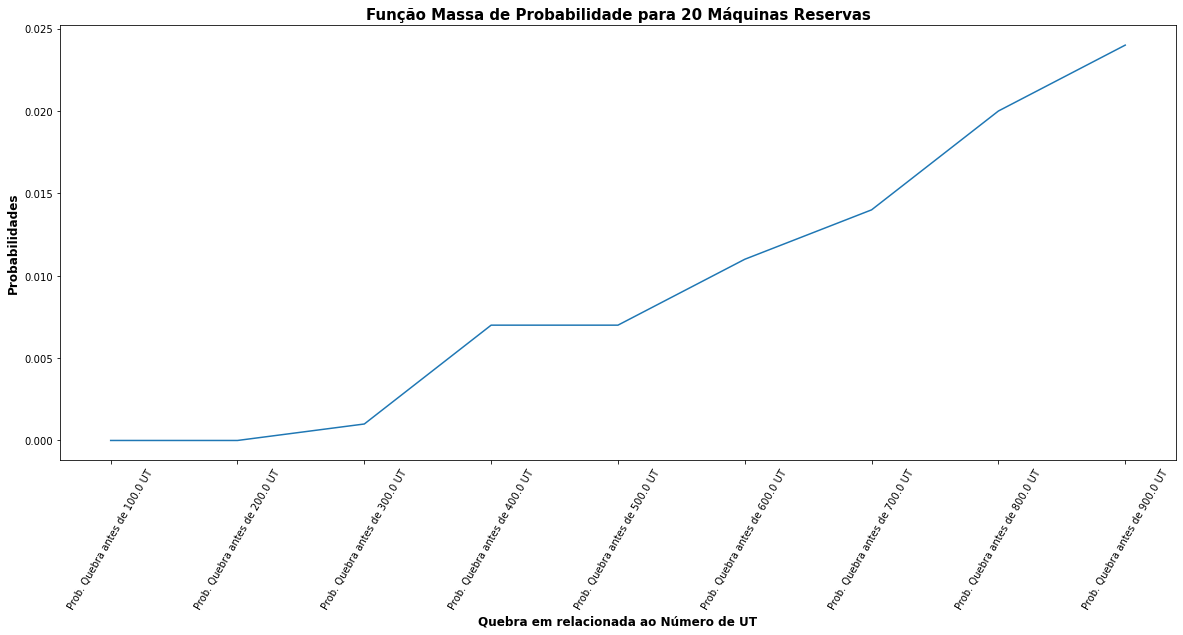

In [50]:
for cols in range(len(probs_a.columns)):
    if cols % 5 == 0 or cols > 10:
        plt.figure(figsize = (20, 8))
        
        plt.title("Função Massa de Probabilidade para " + str(cols) + " Máquinas Reservas", fontsize = 15, fontweight = 800)
        plt.xlabel('Quebra em relacionada ao Número de UT', fontsize = 12, fontweight = 600)
        plt.ylabel('Probabilidades', fontsize = 12, fontweight = 600)
        
        plt.plot(probs_a.iloc[:-1, cols])
        
        for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(60)
            
            
        plt.savefig('fmp ' + str(cols) + ' Maquinas Reservas.png')

### b) n = 20 e p0 = 0.01


Iserir numero maximo de maquinas reservas:  30
Iserir numero minimo de maquinas reservas:  0

Inserir numero de testes a serem realizados para cada quantidade de maquinas reservas no intervalo selecionado:  1000



Para  0  máquinas reservas a média de unidades de tempo para colapso é:  4.933 
Já a variância assume um total de:  14.986511 


Para  1  máquinas reservas a média de unidades de tempo para colapso é:  8.609 
Já a variância assume um total de:  22.740119 


Para  2  máquinas reservas a média de unidades de tempo para colapso é:  11.803 
Já a variância assume um total de:  25.976191 


Para  3  máquinas reservas a média de unidades de tempo para colapso é:  15.547 
Já a variância assume um total de:  32.773790999999996 


Para  4  máquinas reservas a média de unidades de tempo para colapso é:  18.198 
Já a variância assume um total de:  38.174796 


Para  5  máquinas reservas a média de unidades de tempo para colapso é:  21.121 
Já a variância assume um total de:  46.186359 


Para  6  máquinas reservas a média de unidades de tempo para colapso é:  23.591 
Já a variância assume um total de:  47.197719 


Para  7  máquinas reservas a média de unidades de tempo para colapso é:  26.611 
J

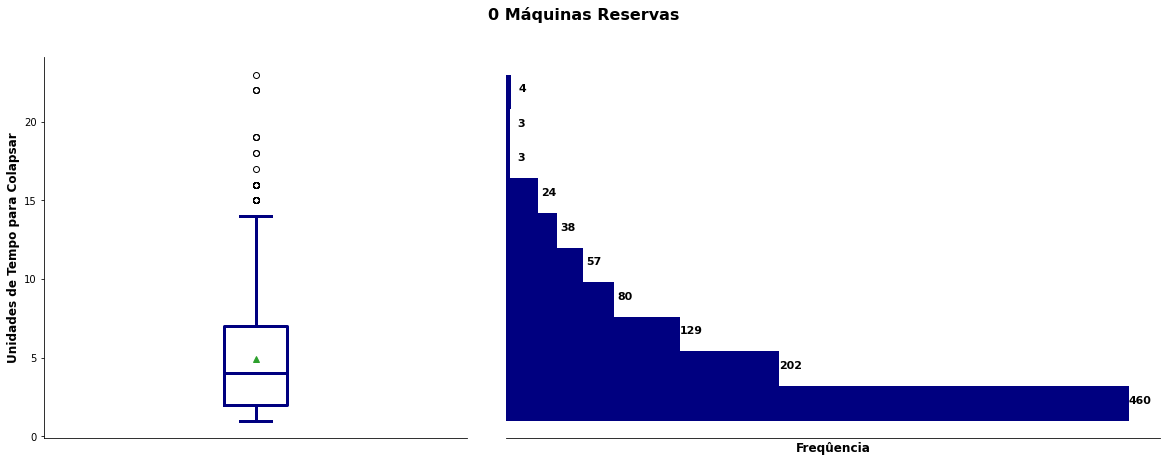

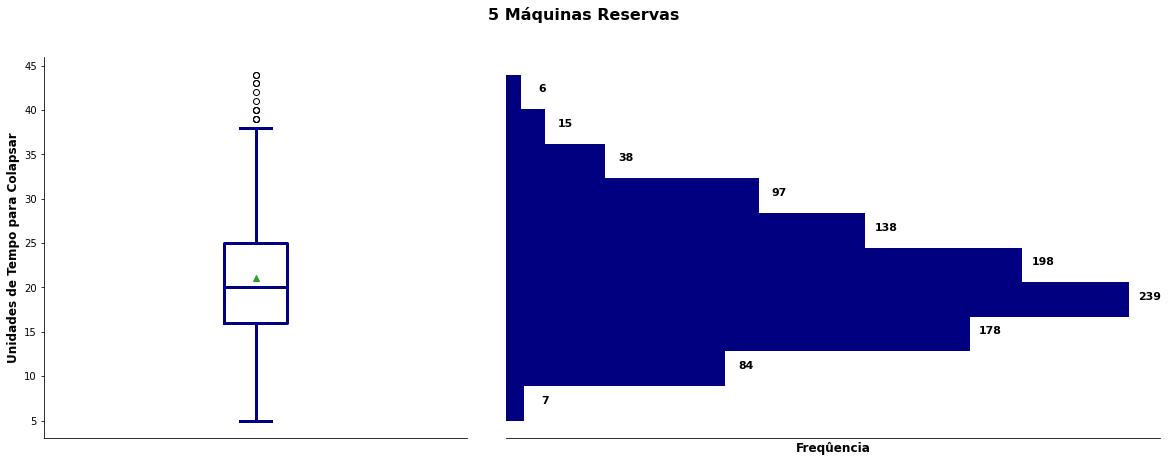

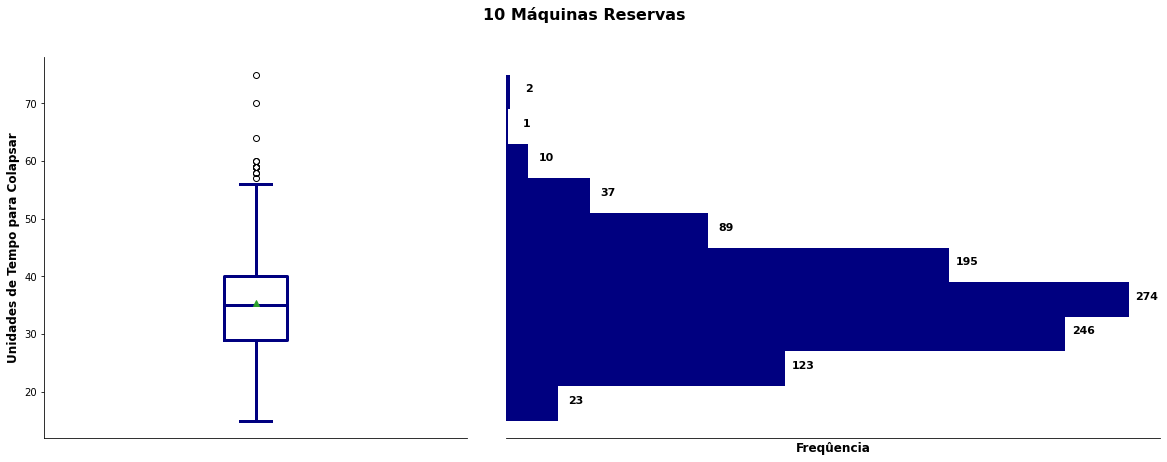

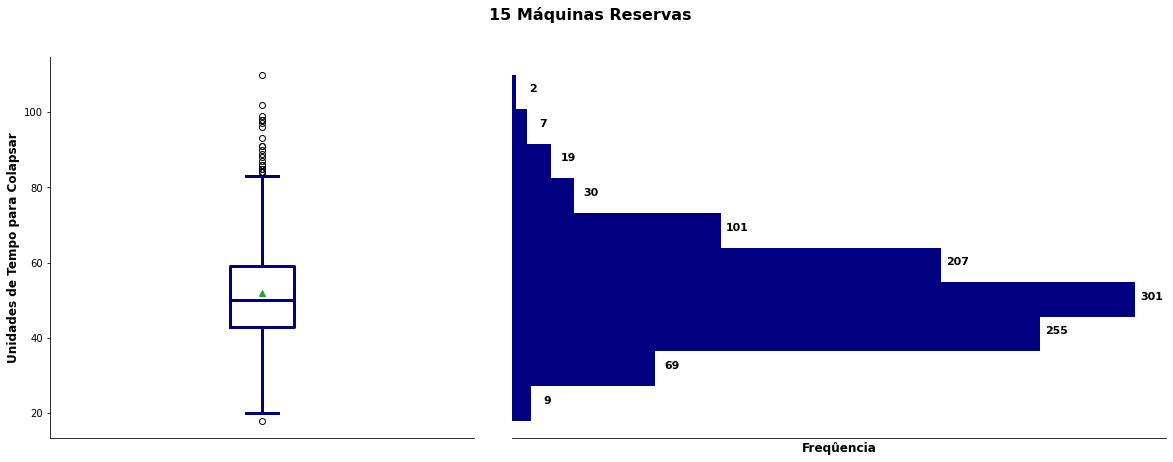

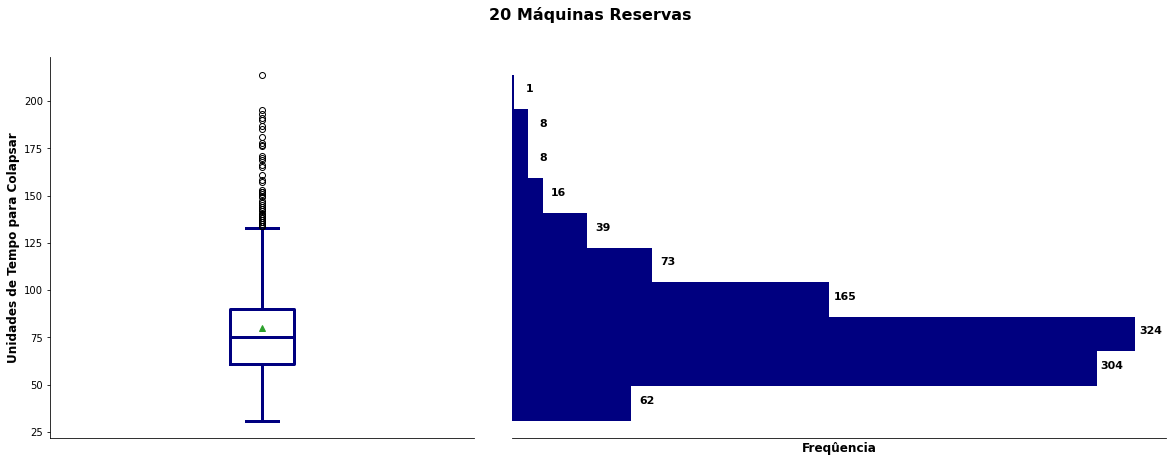

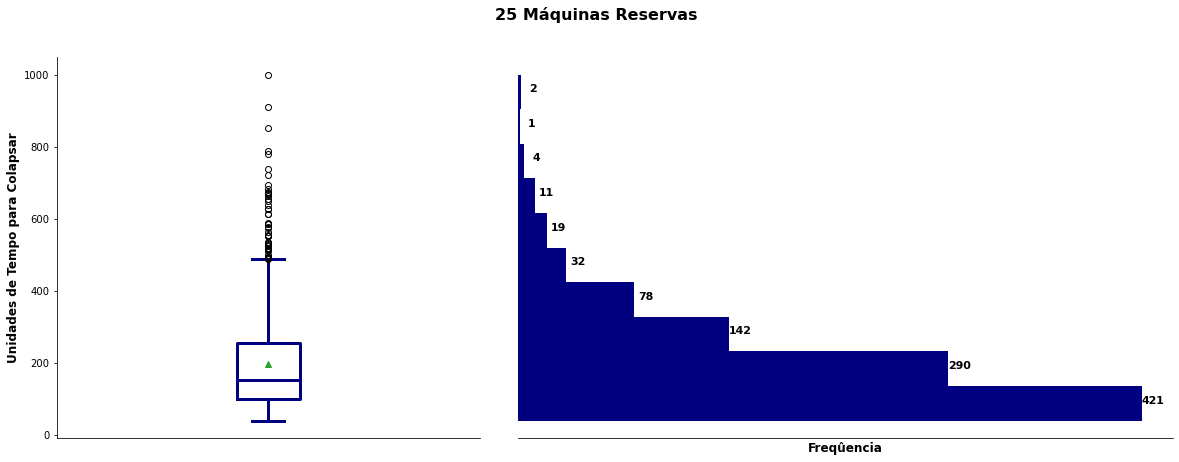

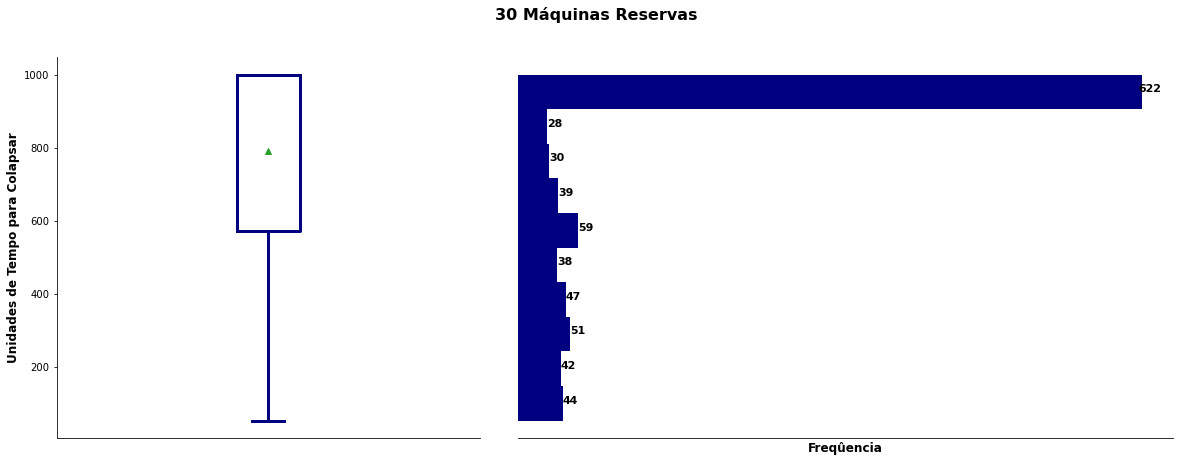

In [51]:
probs_b = testRandomFuncMaq(20, 0.01, 10)

/var/folders/xc/pt5c14vd1ylgywb_0q1bml0r0000gn/T/ipykernel_51843/3772852055.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (20, 8))


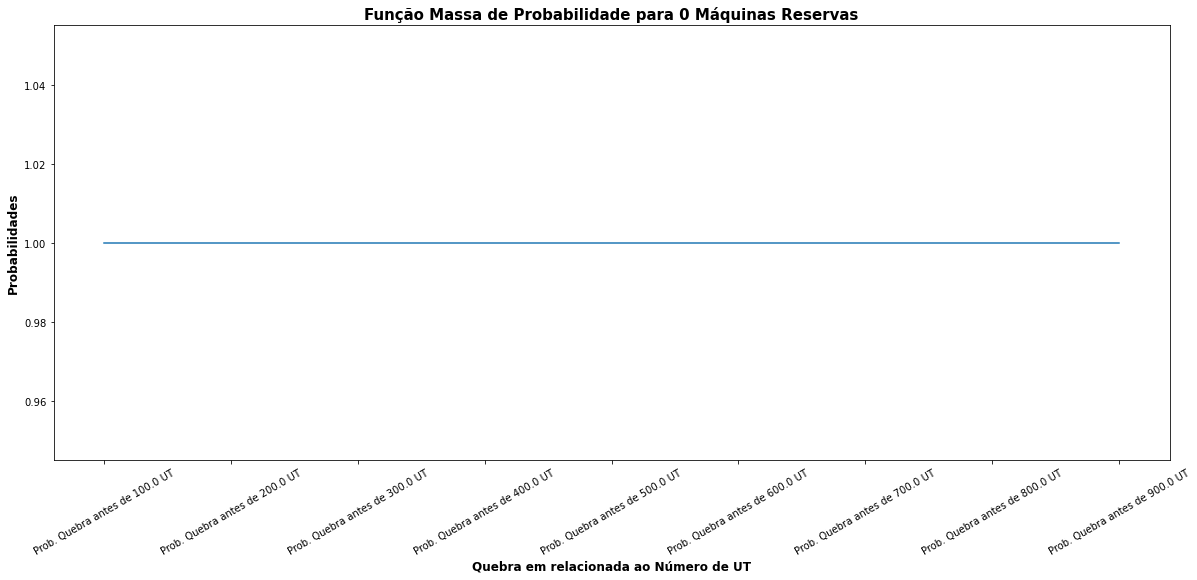

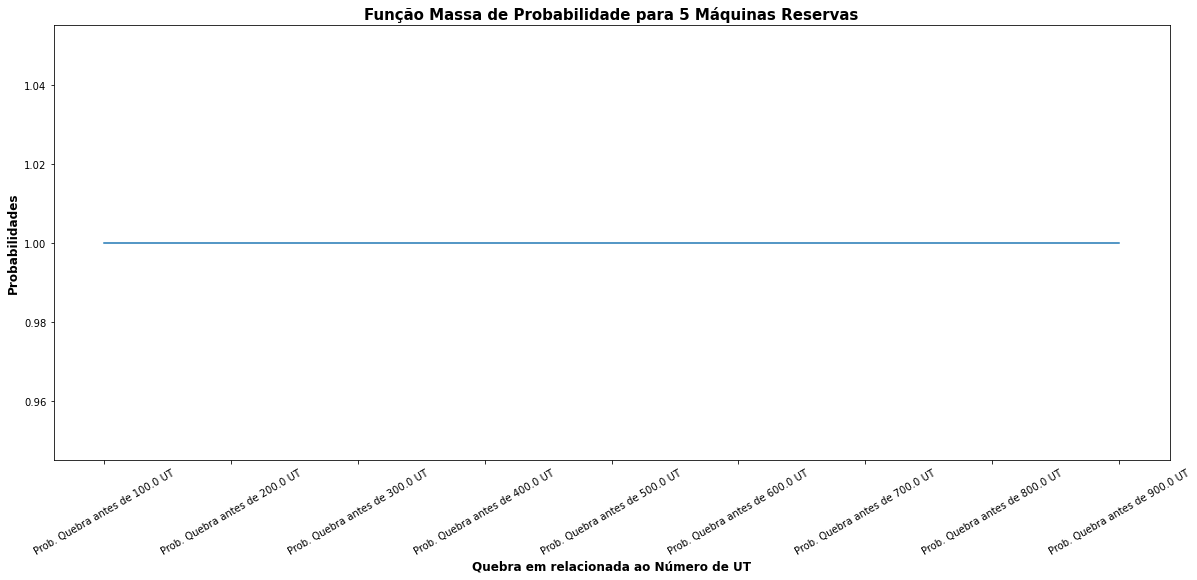

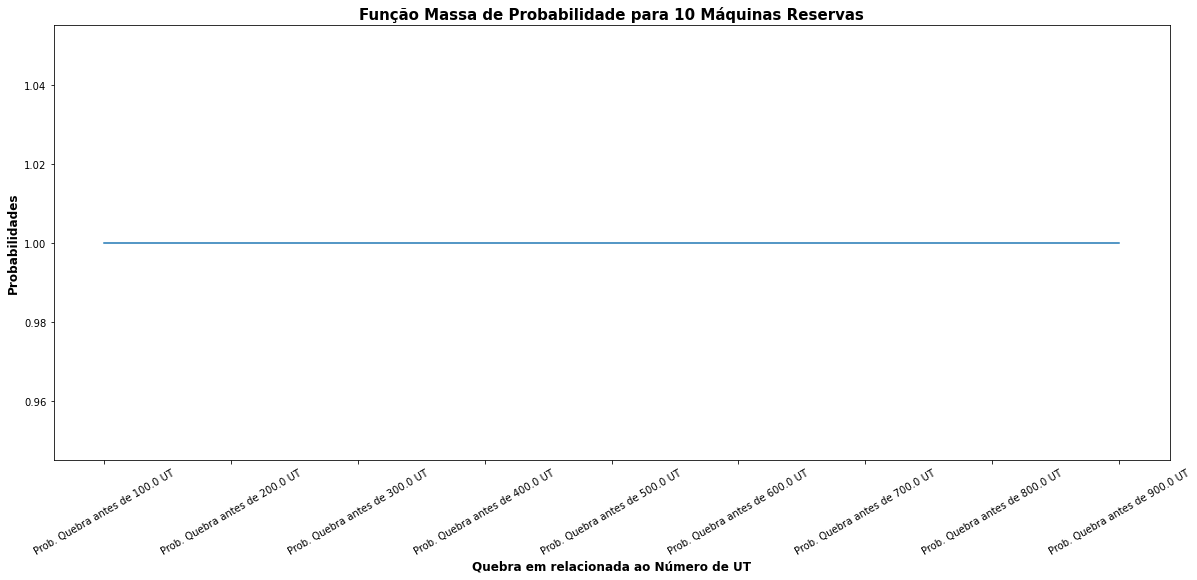

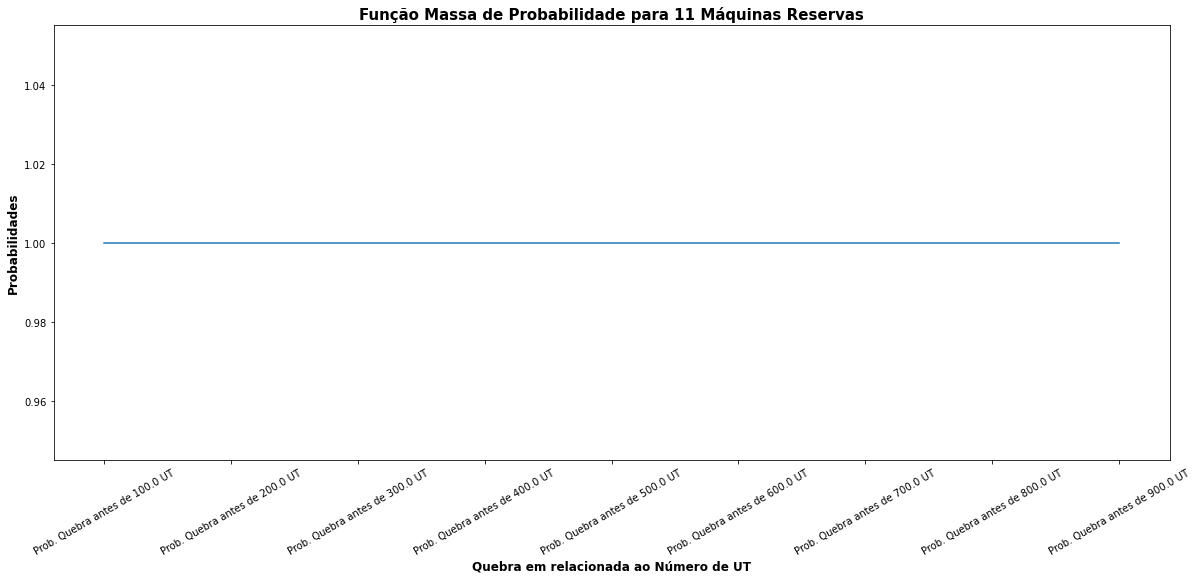

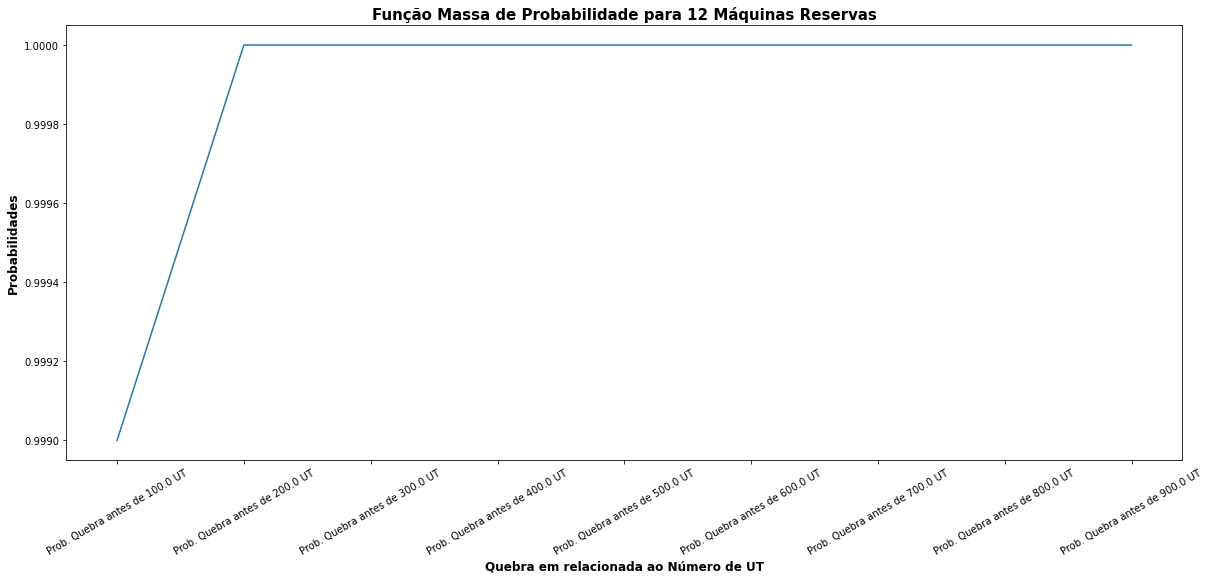

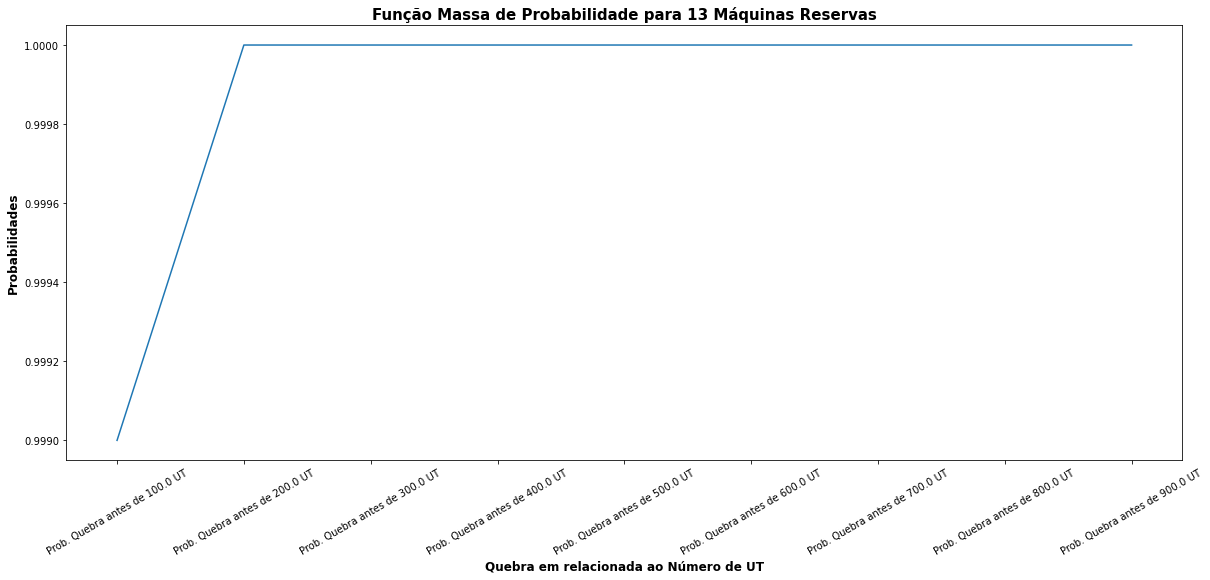

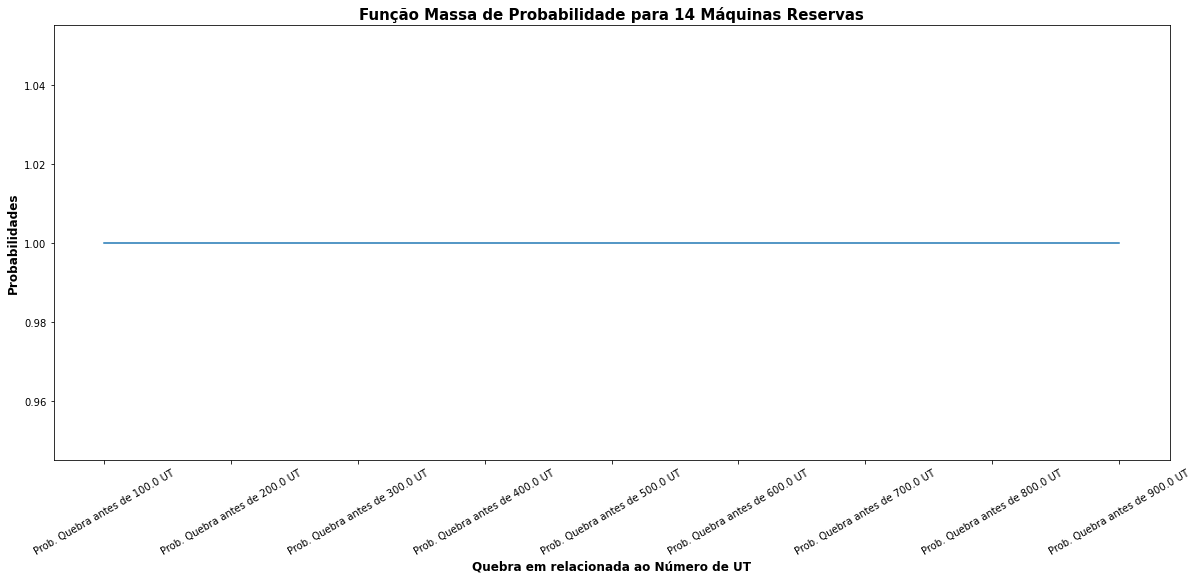

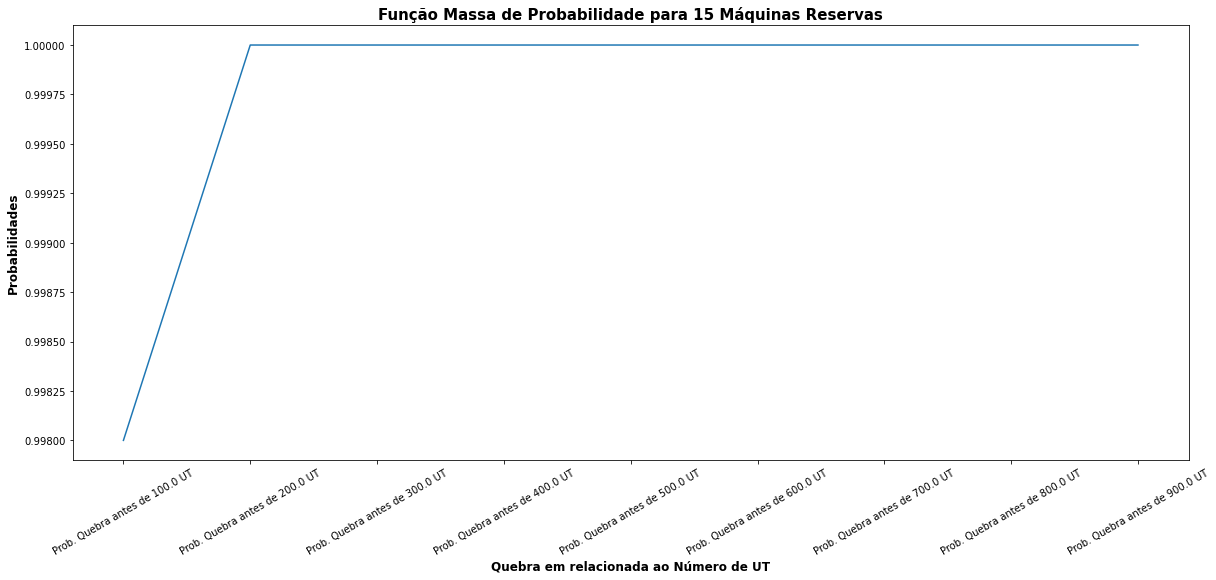

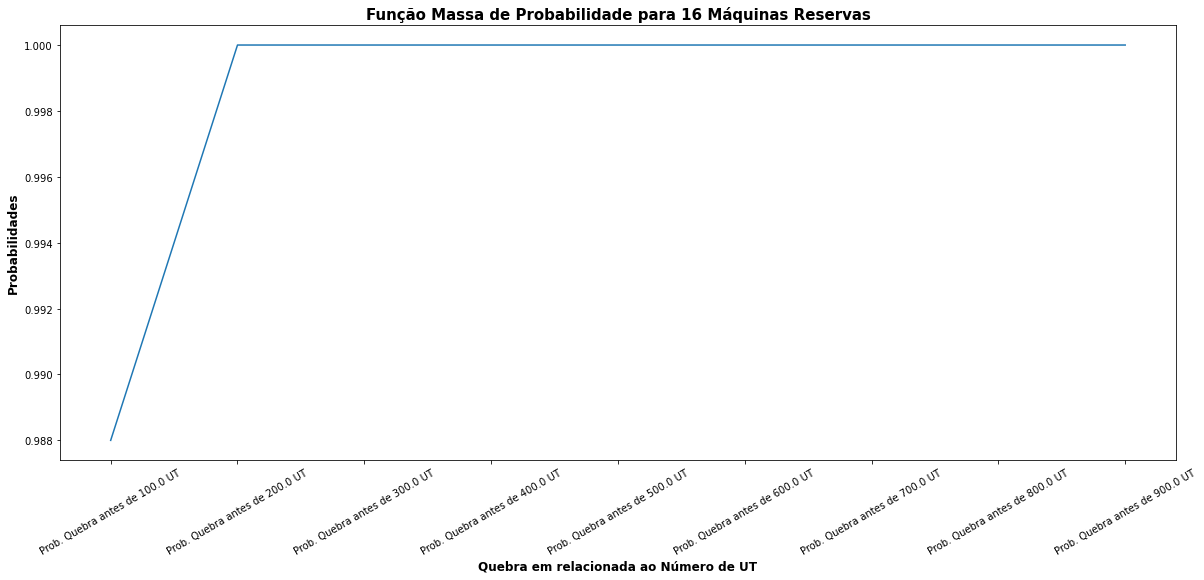

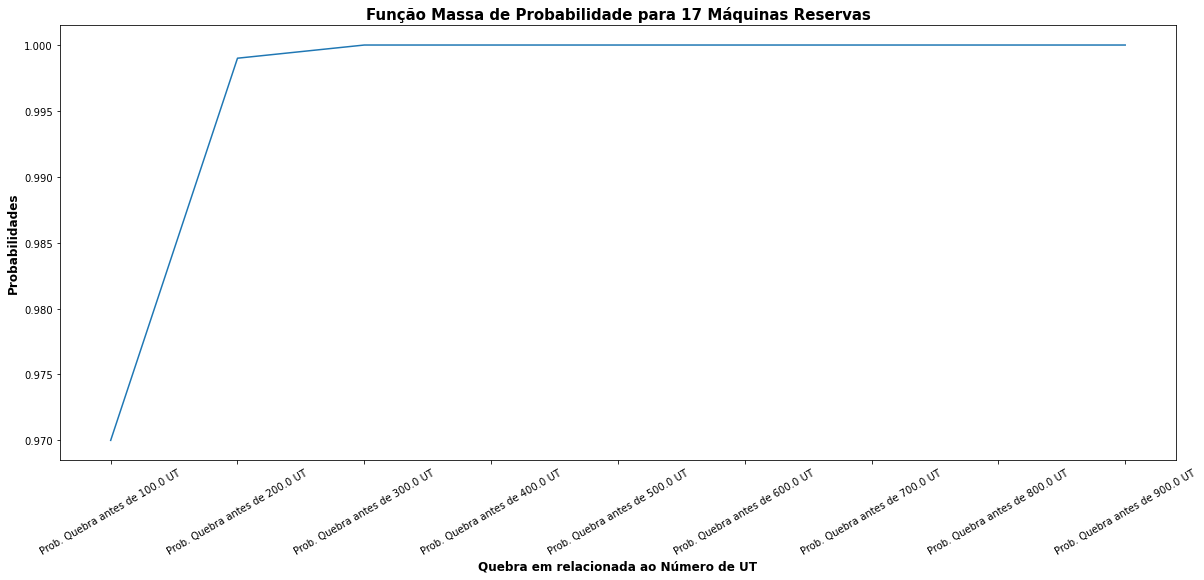

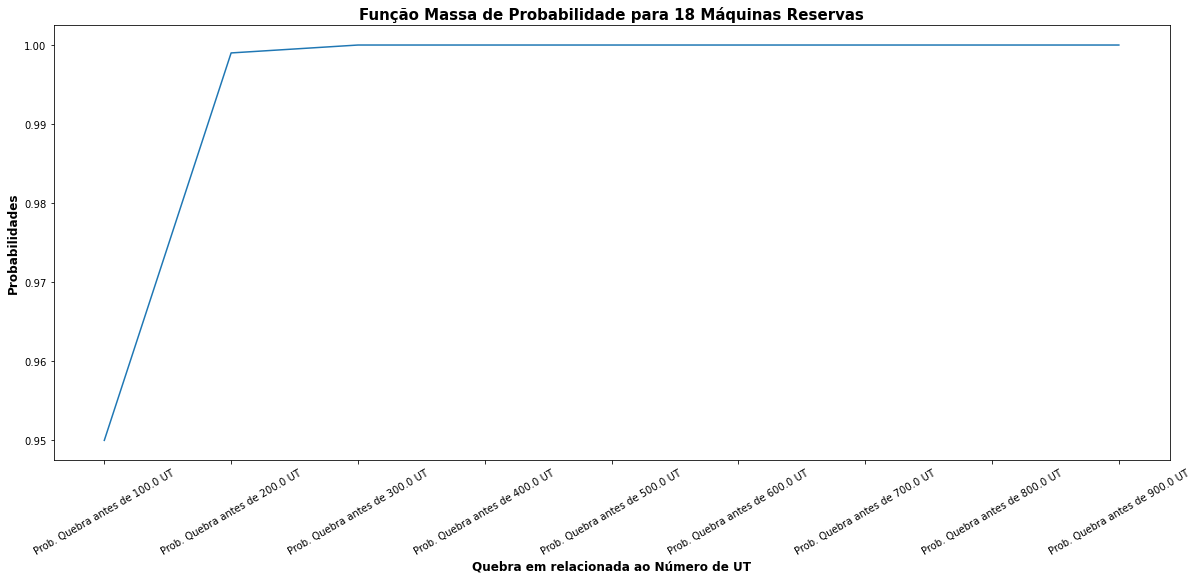

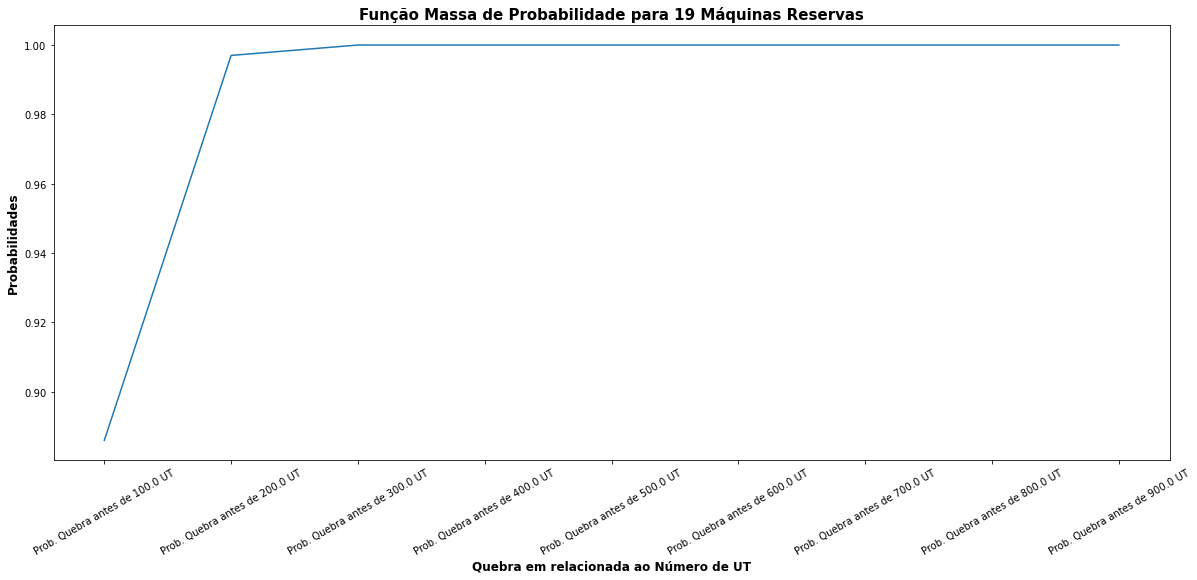

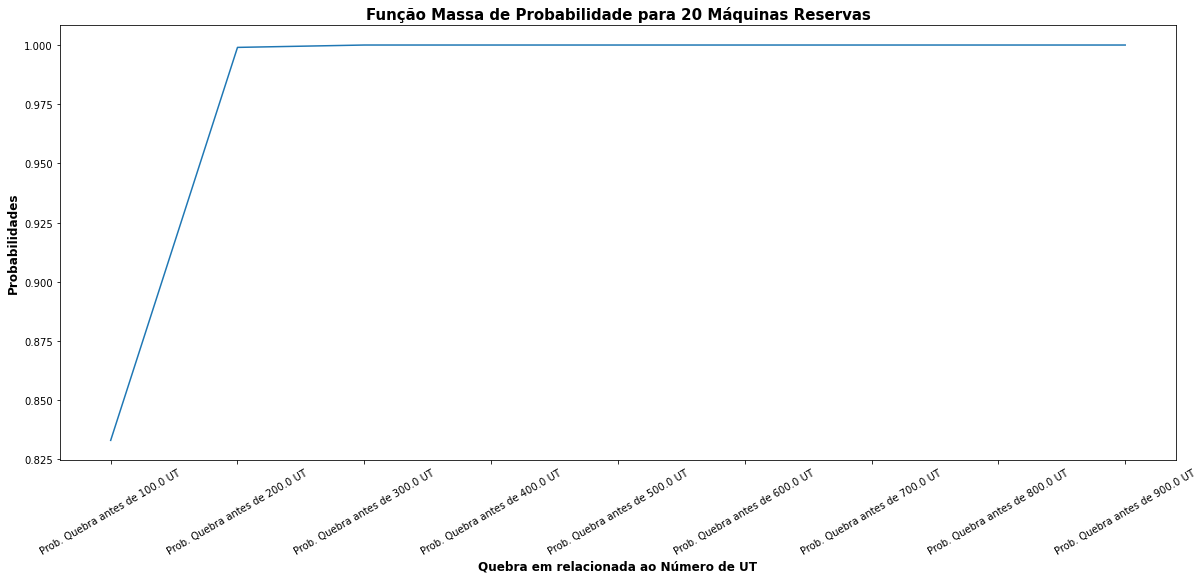

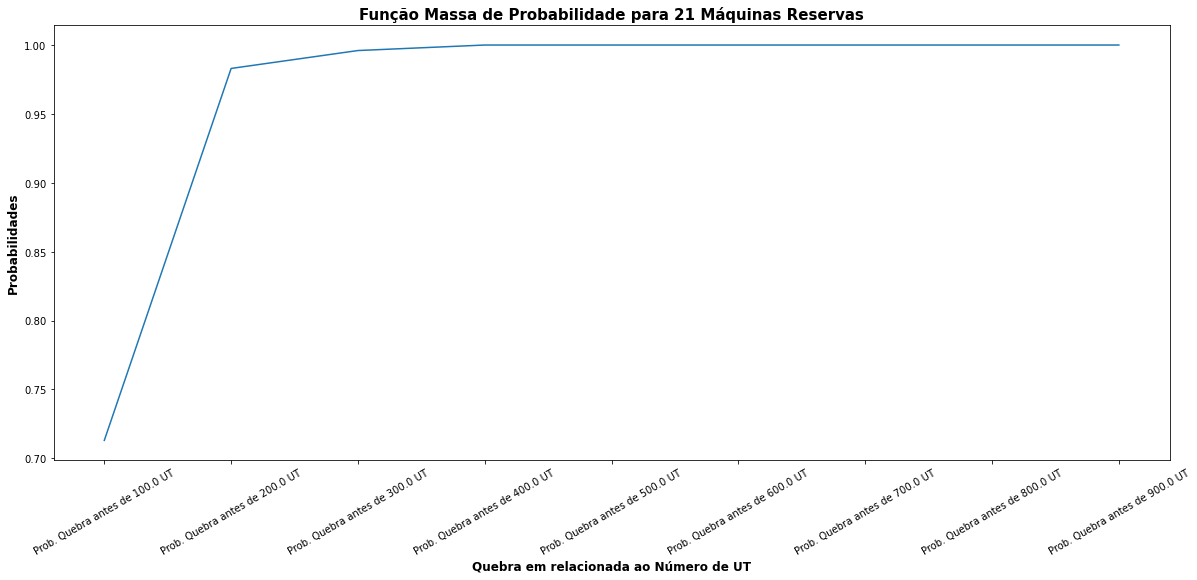

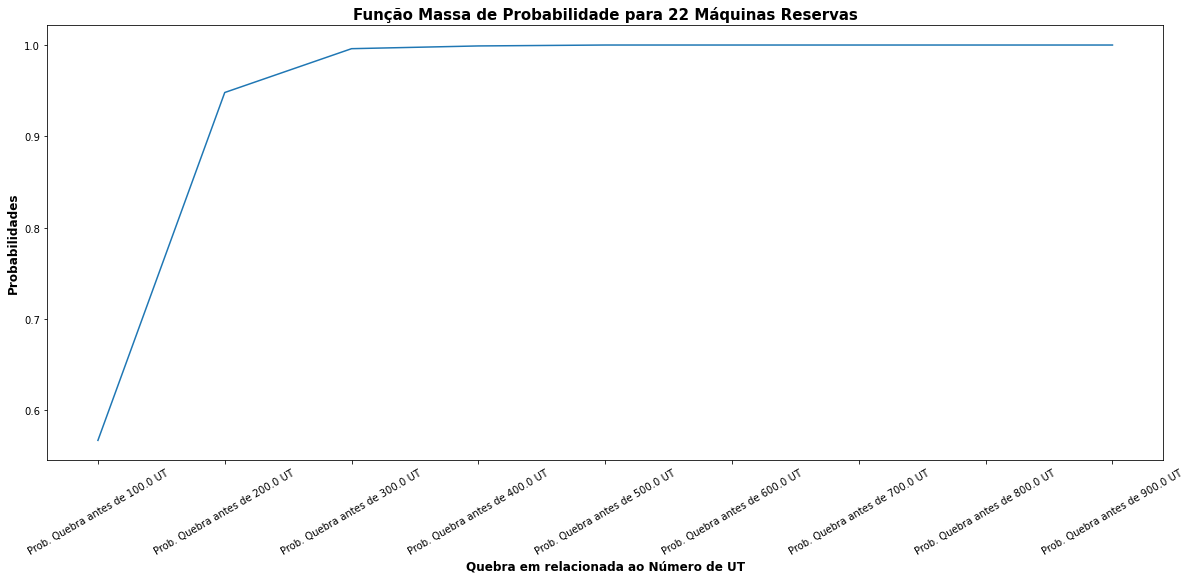

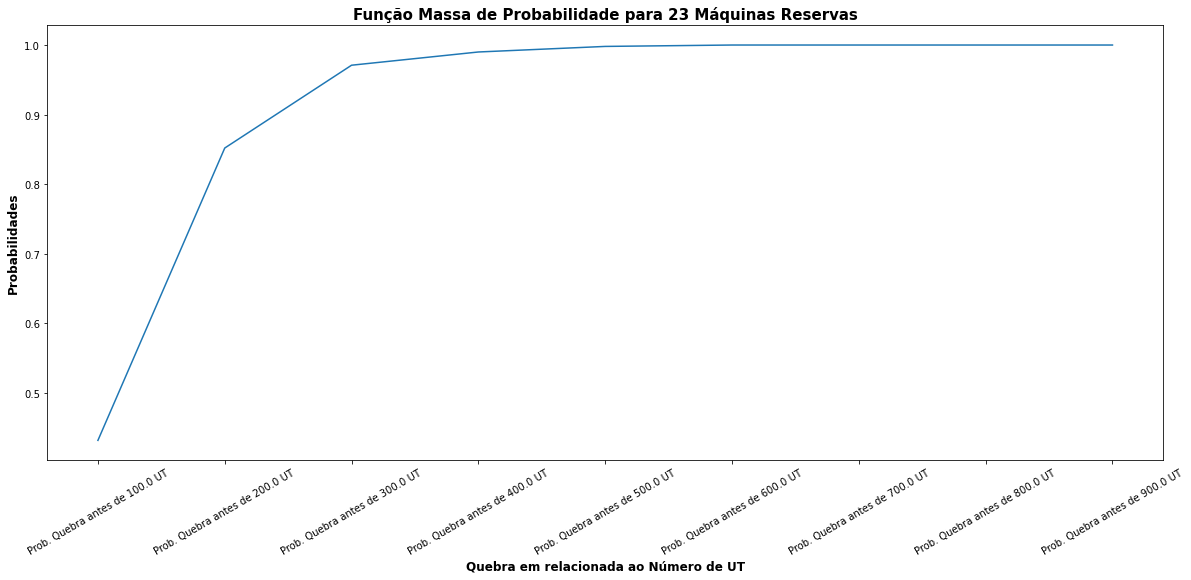

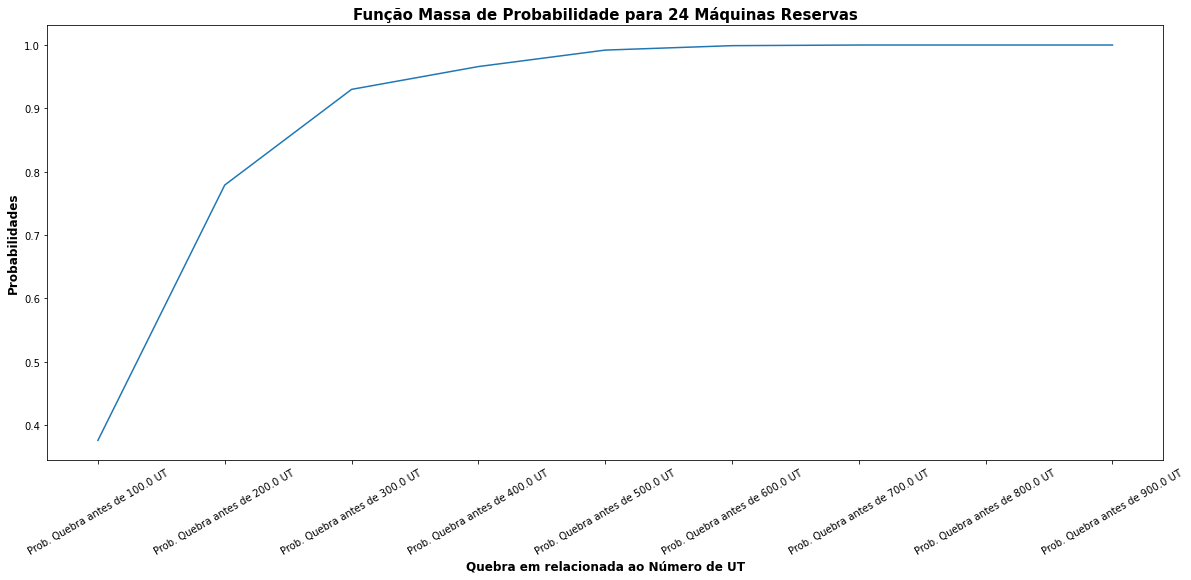

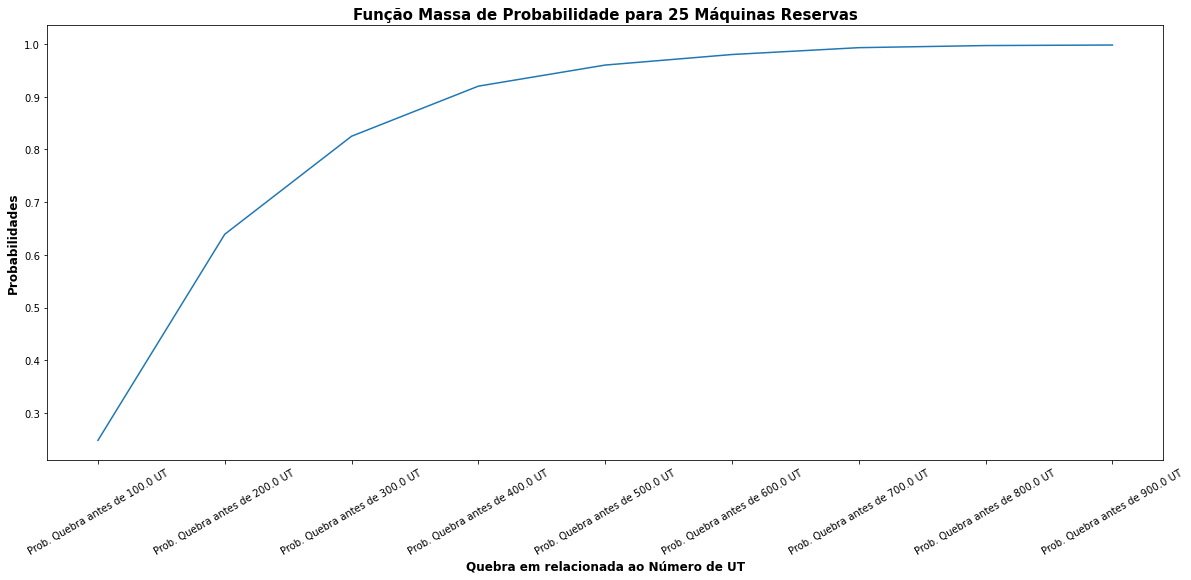

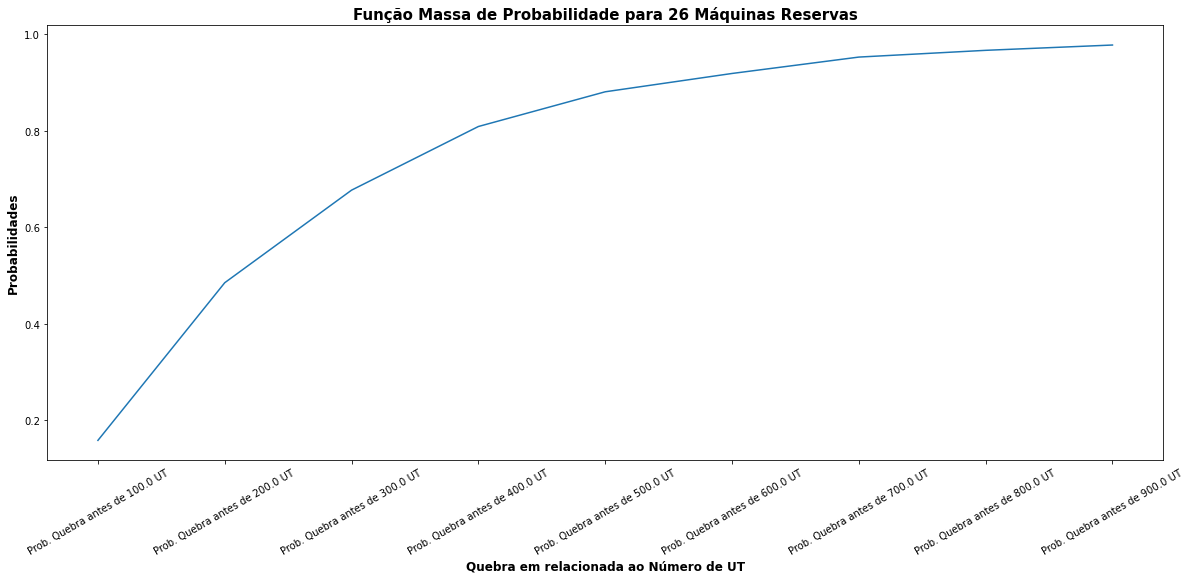

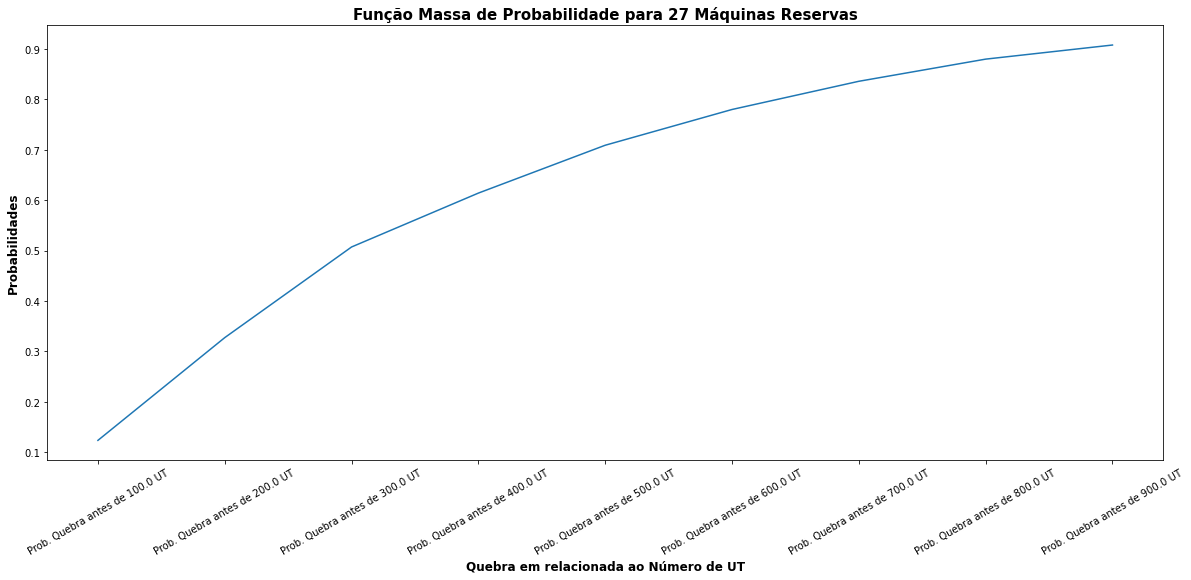

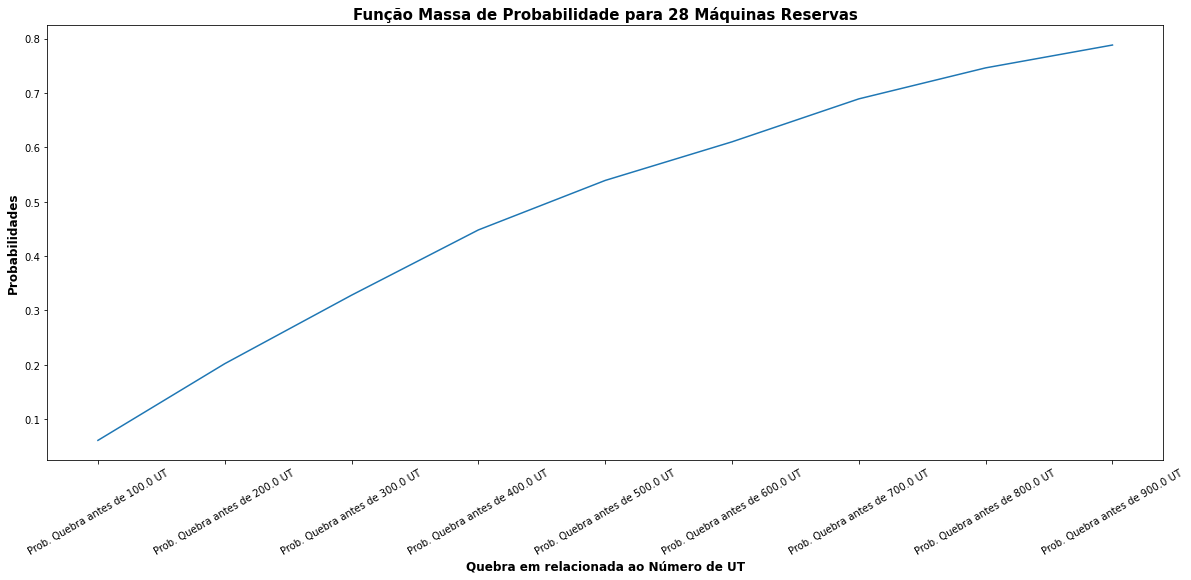

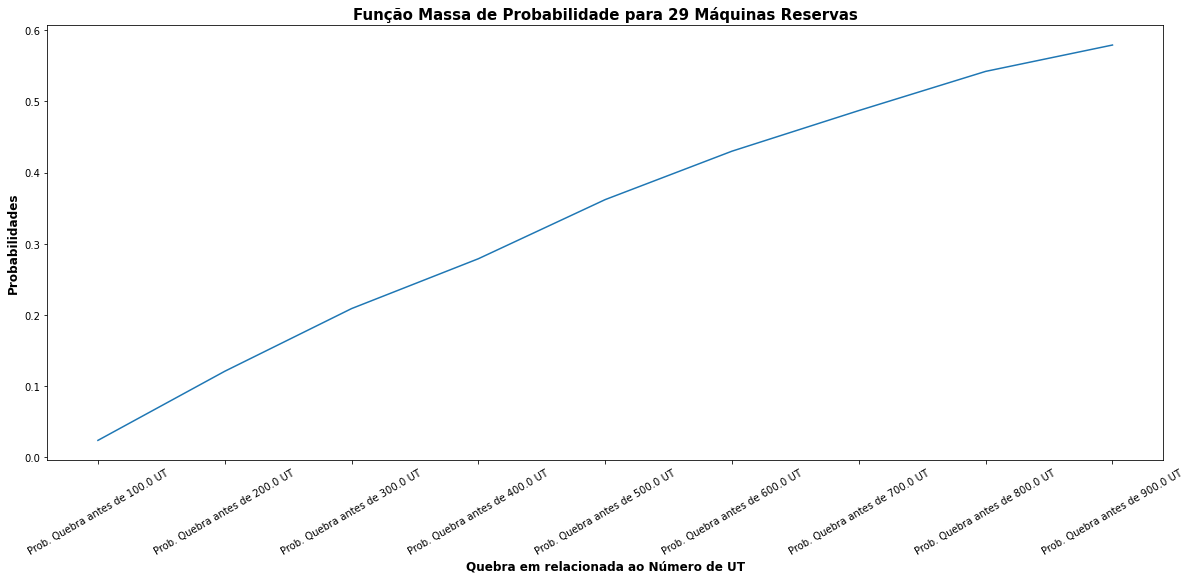

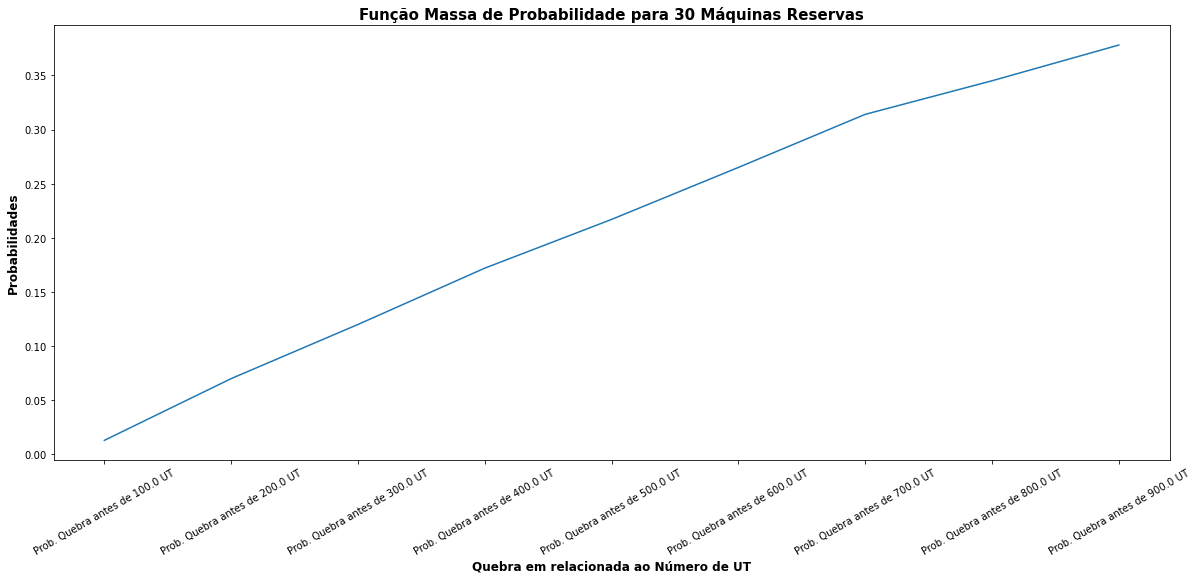

In [52]:
for cols in range(len(probs_b.columns)):
    if cols % 5 == 0 or cols > 10:
        plt.figure(figsize = (20, 8))
        
        plt.title("Função Massa de Probabilidade para " + str(cols) + " Máquinas Reservas", fontsize = 15, fontweight = 800)
        plt.xlabel('Quebra em relacionada ao Número de UT', fontsize = 12, fontweight = 600)
        plt.ylabel('Probabilidades', fontsize = 12, fontweight = 600)
        
        plt.plot(probs_b.iloc[:-1, cols])
        
        for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(30)
            
            
        plt.savefig('fmp ' + str(cols) + ' Maquinas Reservas.png')

### c) n = 10 e p0 = 0.015


Iserir numero maximo de maquinas reservas:  20
Iserir numero minimo de maquinas reservas:  0

Inserir numero de testes a serem realizados para cada quantidade de maquinas reservas no intervalo selecionado:  1000



Para  0  máquinas reservas a média de unidades de tempo para colapso é:  6.043 
Já a variância assume um total de:  22.879151000000004 


Para  1  máquinas reservas a média de unidades de tempo para colapso é:  11.568 
Já a variância assume um total de:  43.459376000000006 


Para  2  máquinas reservas a média de unidades de tempo para colapso é:  16.021 
Já a variância assume um total de:  51.302558999999995 


Para  3  máquinas reservas a média de unidades de tempo para colapso é:  20.21 
Já a variância assume um total de:  67.73590000000002 


Para  4  máquinas reservas a média de unidades de tempo para colapso é:  25.307 
Já a variância assume um total de:  83.828751 


Para  5  máquinas reservas a média de unidades de tempo para colapso é:  30.057 
Já a variância assume um total de:  104.62175099999999 


Para  6  máquinas reservas a média de unidades de tempo para colapso é:  34.567 
Já a variância assume um total de:  129.61951100000002 


Para  7  máquinas reservas a média de 

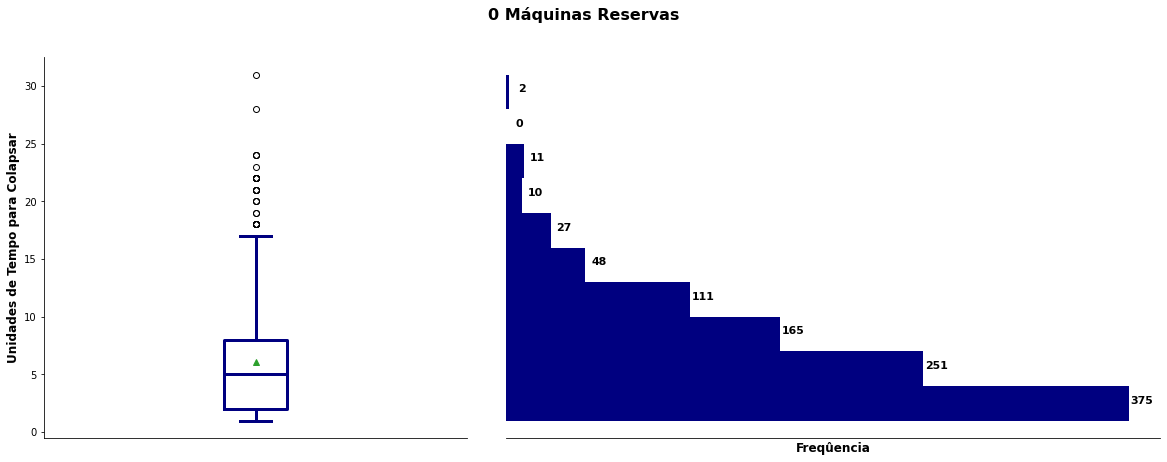

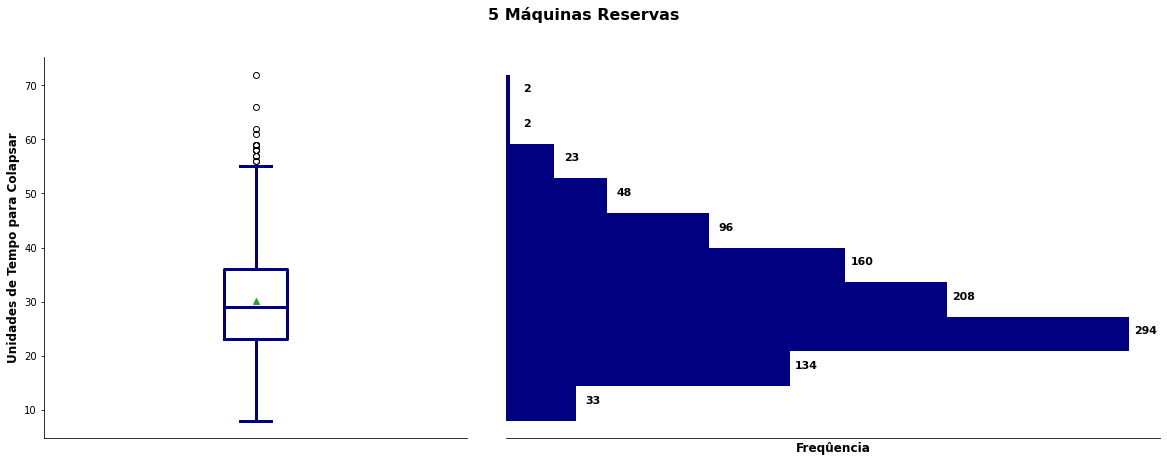

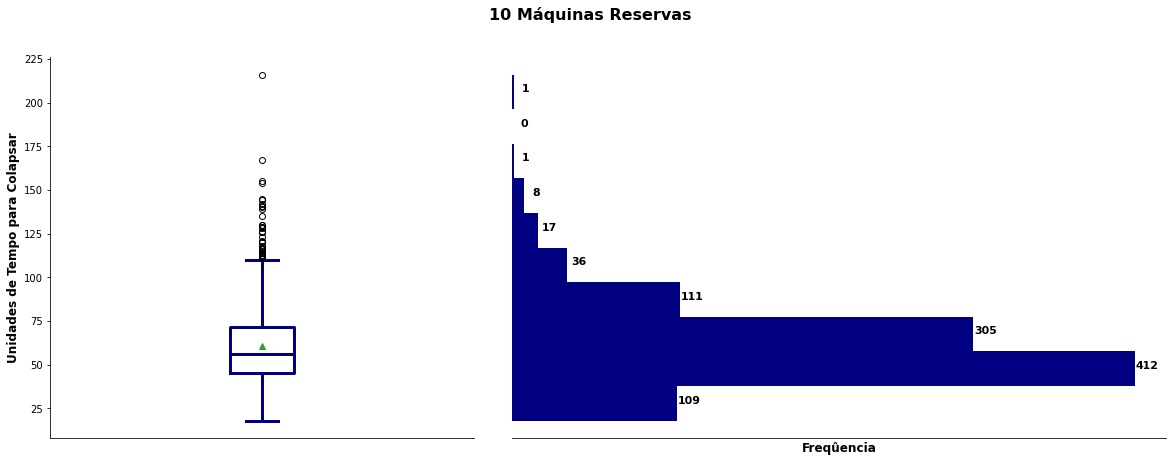

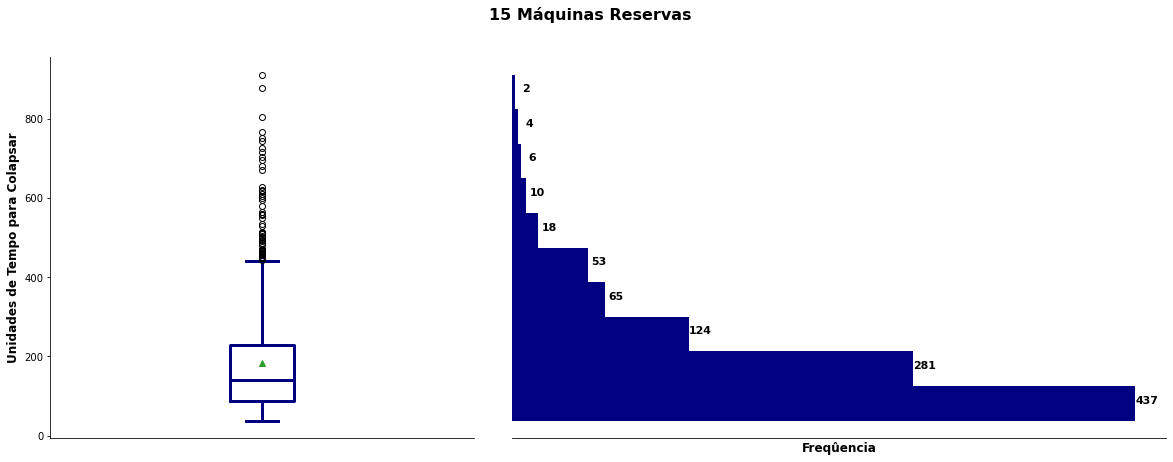

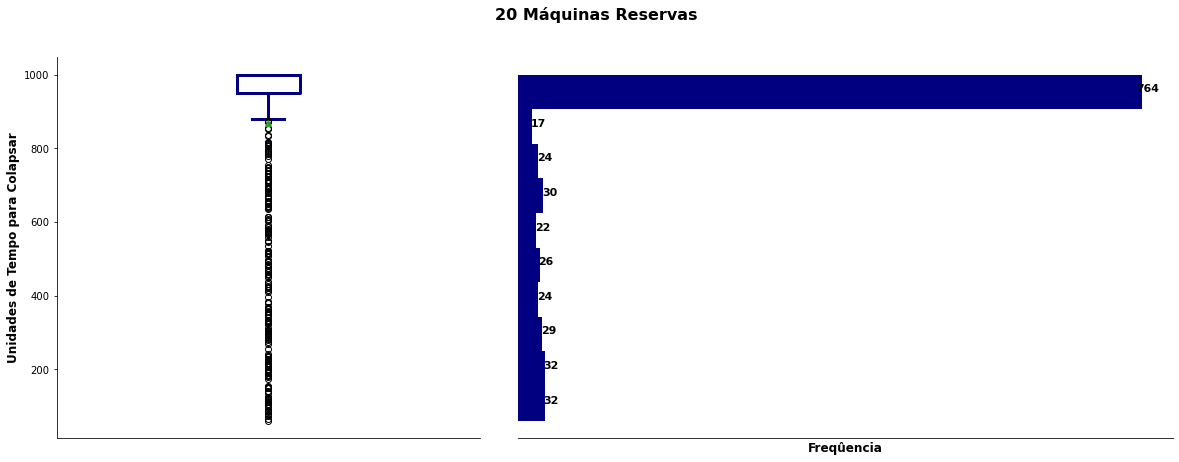

In [53]:
probs_c = testRandomFuncMaq(10, 0.015, 10)

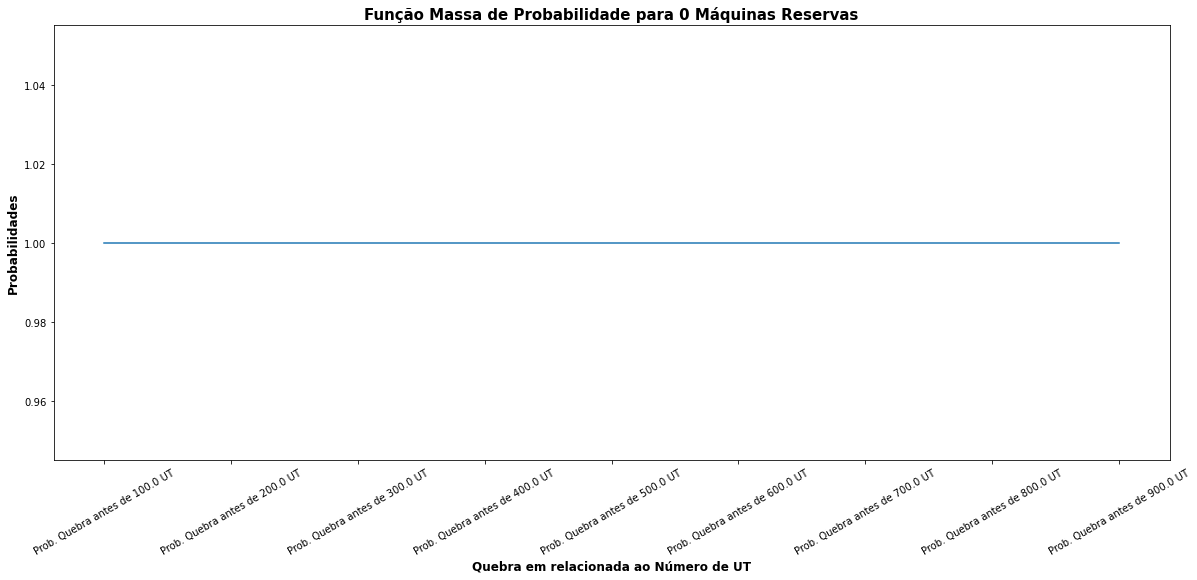

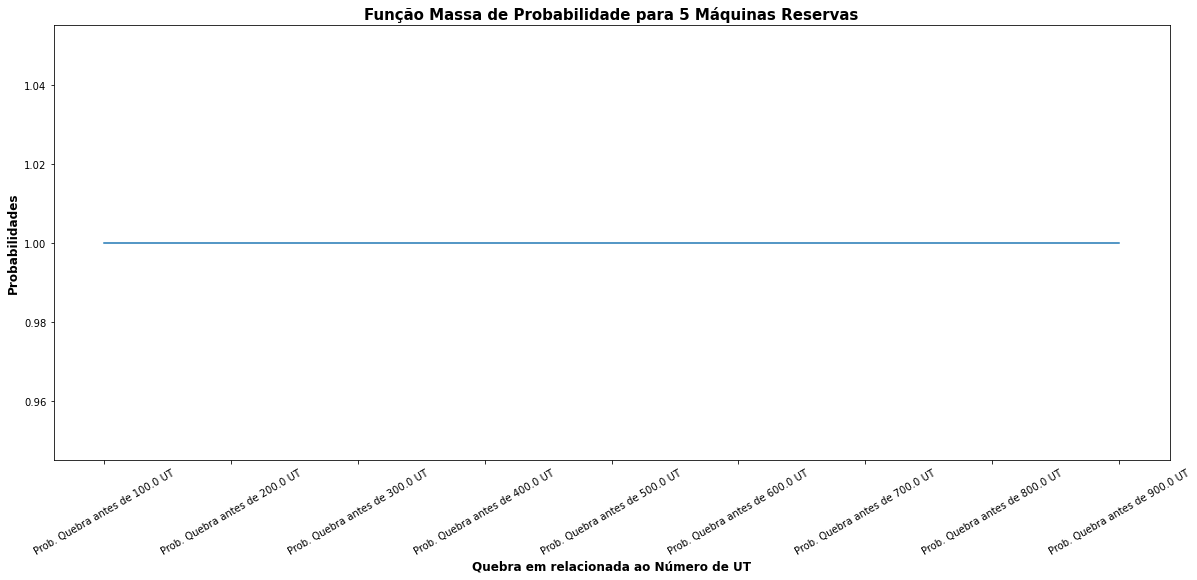

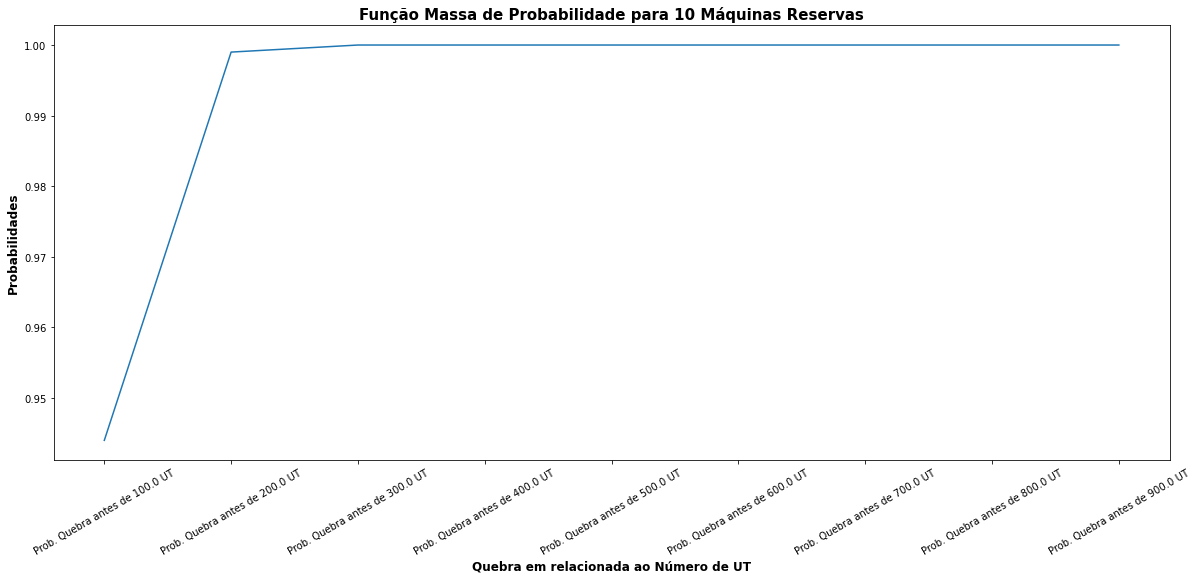

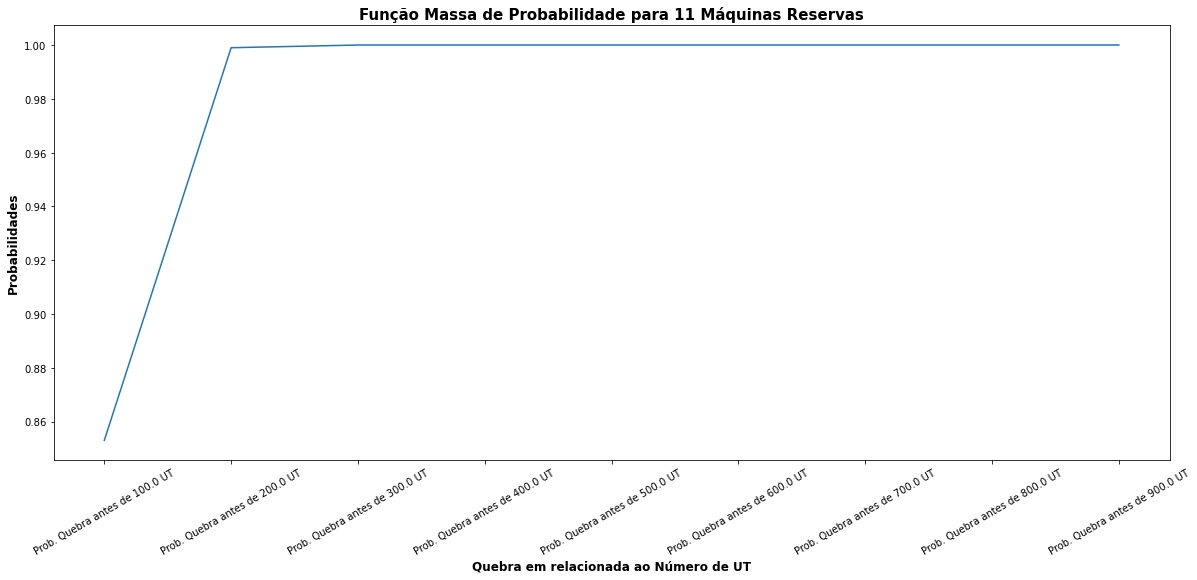

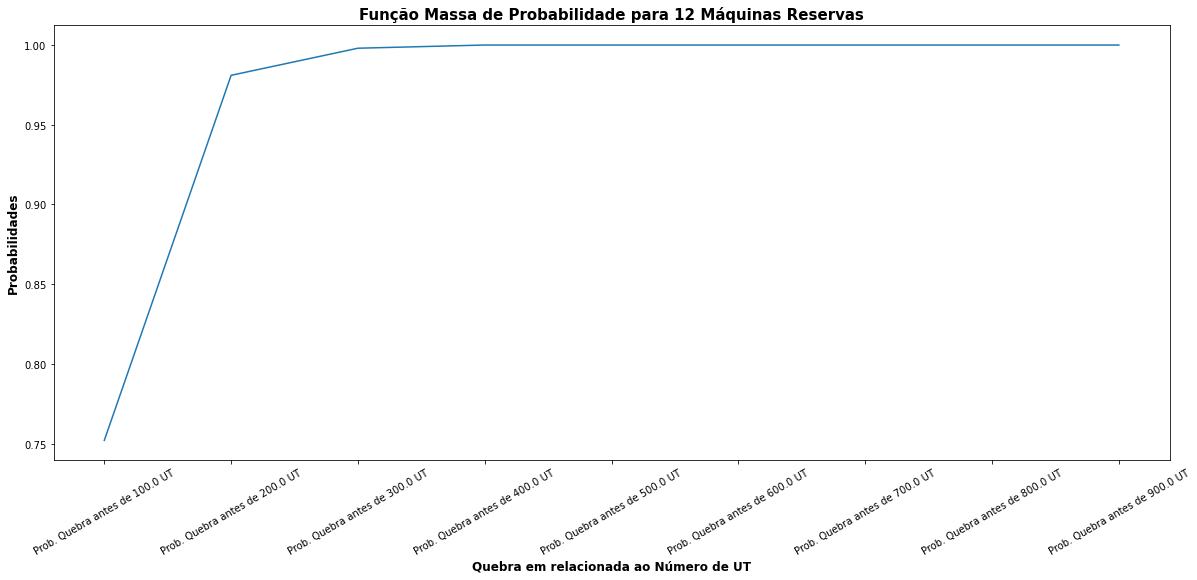

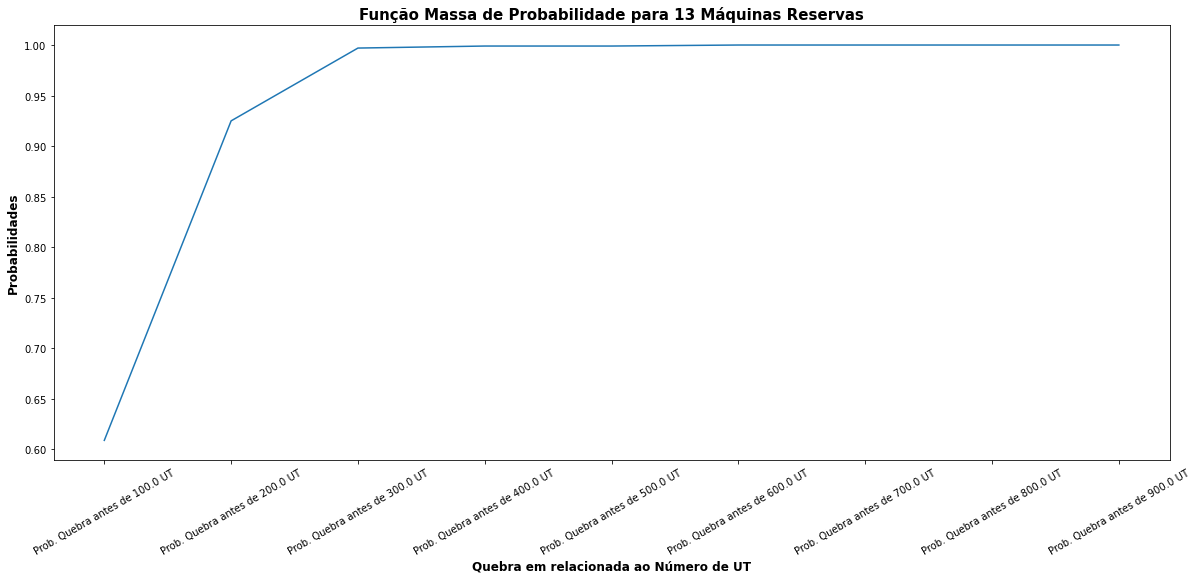

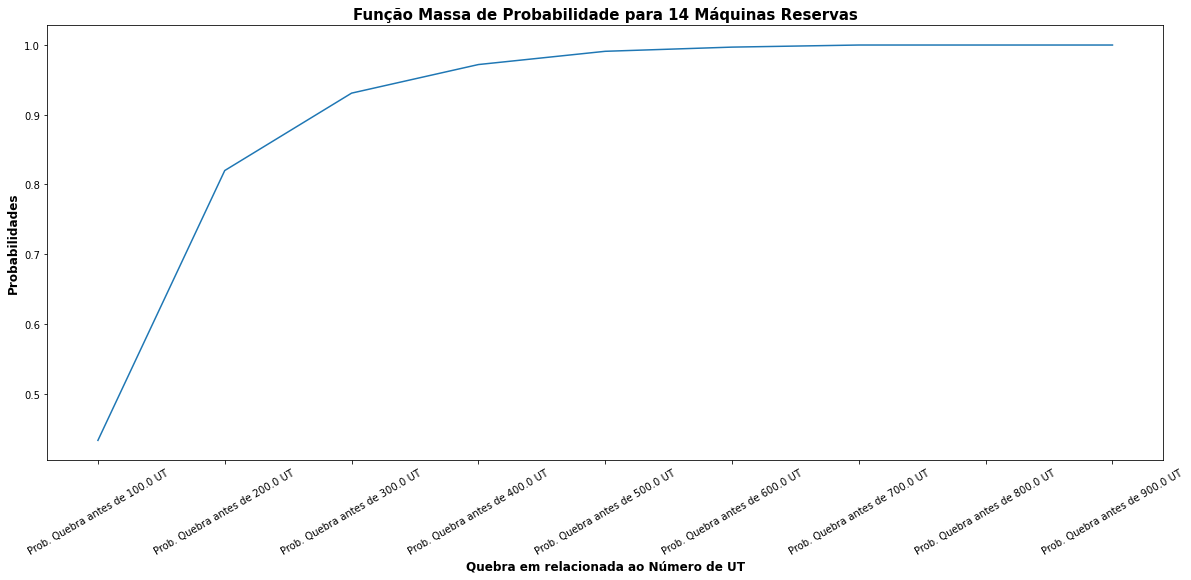

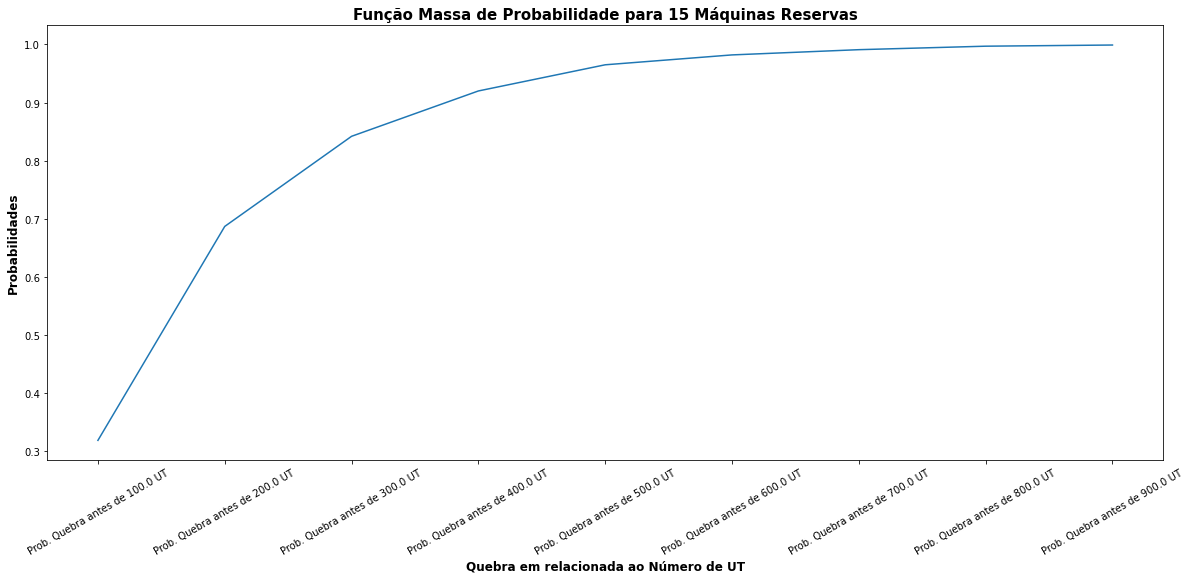

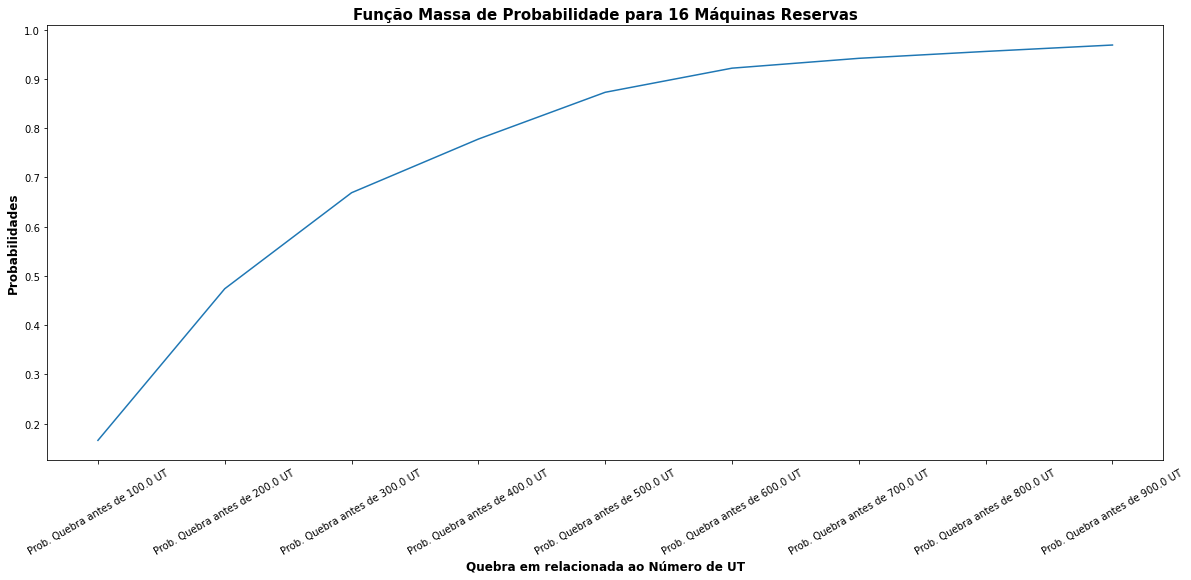

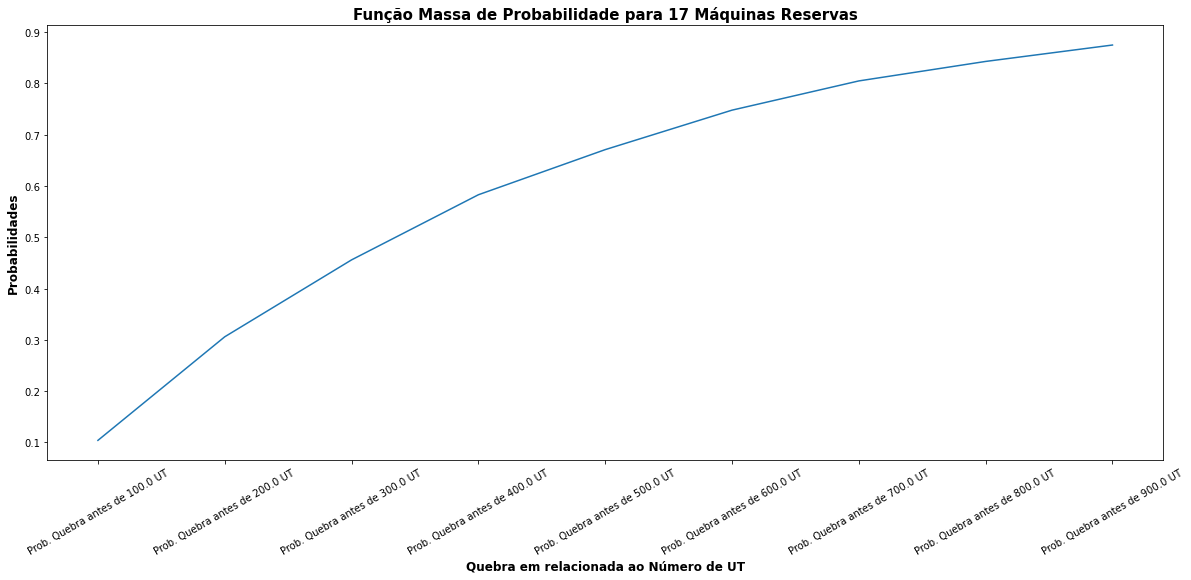

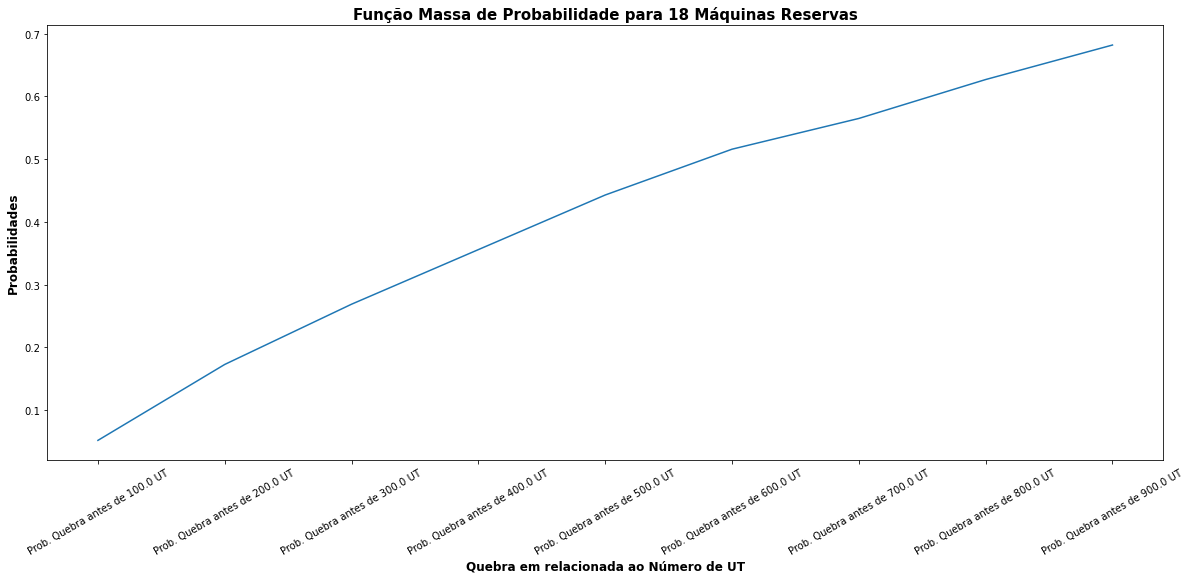

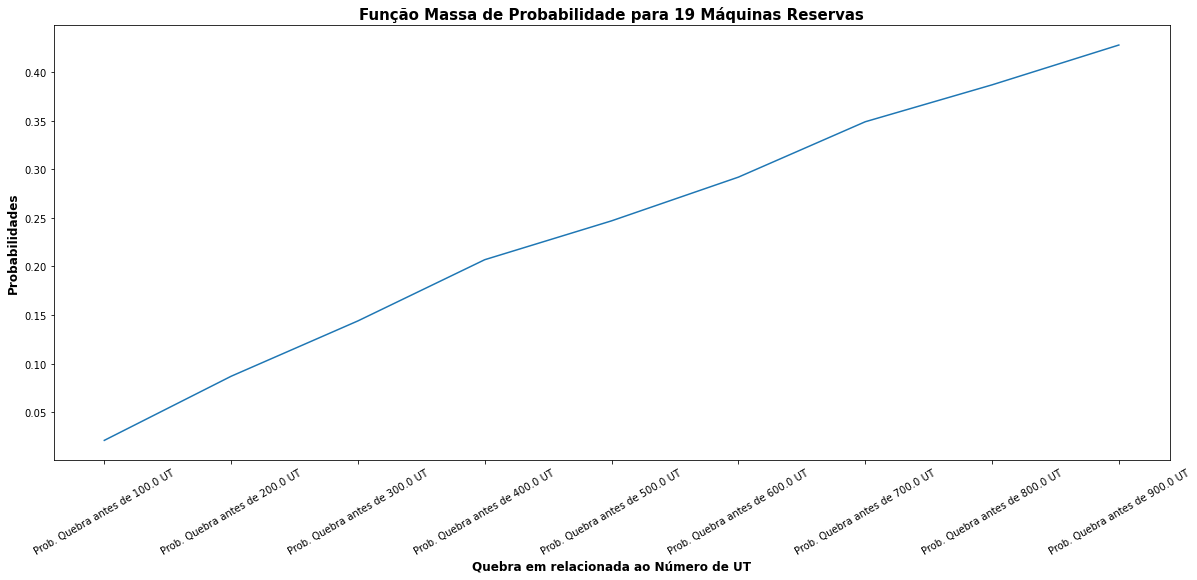

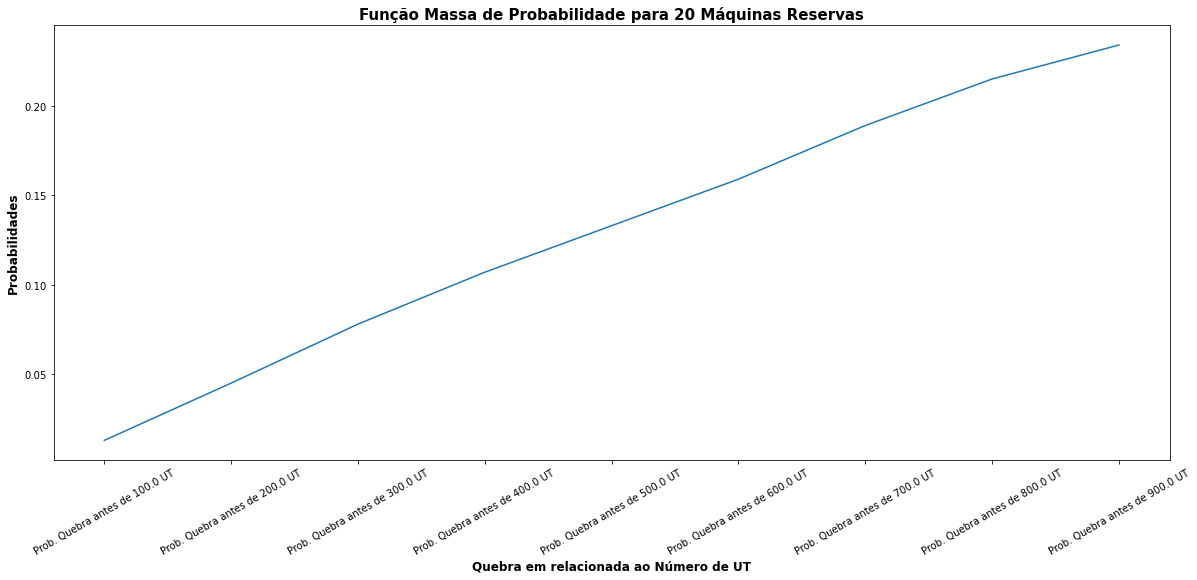

In [54]:
for cols in range(len(probs_c.columns)):
    if cols % 5 == 0 or cols > 10:
        plt.figure(figsize = (20, 8))
        
        plt.title("Função Massa de Probabilidade para " + str(cols) + " Máquinas Reservas", fontsize = 15, fontweight = 800)
        plt.xlabel('Quebra em relacionada ao Número de UT', fontsize = 12, fontweight = 600)
        plt.ylabel('Probabilidades', fontsize = 12, fontweight = 600)
        
        plt.plot(probs_c.iloc[:-1, cols])
        
        for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(30)
            
            
        plt.savefig('fmp ' + str(cols) + ' Maquinas Reservas.png')

### Obs:

    - Por uma falta de perspectiva cometemos um deslize na confecção do código (possivel de ser concertado para proxima entrega), no momento de criar o DataFrame os nomes do index sao derivados diretamente da quantidade total de unidades de tempo estabelecidas pelo problema, sendo assim, para combinar o numero de subdivisoes de calculos de probabilidade com o numero de subdivisoes no tempo total utilizado, o numero de testes na funcao selecaoDeProba deve ser igual a 1000. Logo mudar esse valor na funcao testRandomFuncMaq deve gerar um erro no algoritmo.